#Analysis of 1,000 Genomes against NC_063383

##Initial Set Up

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import openpyxl
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Read in CSV with 1,000 US sequences we care about
SequencesCSV = pd.read_csv(\
              '/content/drive/My Drive/QBIO_401_notes/CSV_For_Final_Proj.csv',\
               header=0, low_memory=False)
# Fill list with Accession ID's of the sequences
listOfAmericanSequences = []
for i in SequencesCSV["Accession"]:
  listOfAmericanSequences.append(i)
# print(listOfAmericanSequences)
SequencesCSV

Accession                                         Submitters  \
0    OP820450  Barbian,H., Green,S., Kunstman,K., Araujo Pere...   
1    OP820451  Barbian,H., Green,S., Kunstman,K., Araujo Pere...   
2    OP820452  Barbian,H., Green,S., Kunstman,K., Araujo Pere...   
3    OP820453  Barbian,H., Green,S., Kunstman,K., Araujo Pere...   
4    OP820454  Barbian,H., Green,S., Kunstman,K., Araujo Pere...   
..        ...                                                ...   
995  ON676704  Gigante,C.M., Lee,P., Seabolt,M.H., Wilkins,K....   
996  ON676705  Gigante,C.M., Atkinson,A., Seabolt,M.H., Wilki...   
997  ON676706  Gigante,C.M., Atkinson,A., Seabolt,M.H., Wilki...   
998  ON627808               Young,E.L., Hergert,J., Oakeson,K.F.   
999  ON563414  Gigante,C.M., Smole,S., Seabolt,M.H., Wilkins,...   

                                          Organization Org_location  \
0    Rush University Meical Center, Regional Innova...          USA   
1    Rush University Meical Center, Regional Innova...          USA   
2    Rush University Meical Center, Regional Innova...          USA   
3    Rush University Meical Center, Regional Innova...          USA   
4    Rush University Meical Center, Regional Innova...          USA   
..                                                 ...          ...   
995  Centers for Disease Control and Prevention, Di...          USA   
996  Centers for Disease Control and Prevention, Di...          USA   
997  Centers for Disease Control and Prevention, Di...          USA   
998                                                NaN          NaN   
999  Centers for Disease Control and Prevention, Di...          USA   

             Release_Date                                   Isolate  \
0    2022-11-14T00:00:00Z  hMpxV/Human/USA/IL-RIPHL-MPXV_10001/2022   
1    2022-11-14T00:00:00Z  hMpxV/Human/USA/IL-RIPHL-MPXV_10002/2022   
2    2022-11-14T00:00:00Z  hMpxV/Human/USA/IL-RIPHL-MPXV_10003/2022   
3    2022-11-14T00:00:00Z  hMpxV/Human/USA/IL-RIPHL-MPXV_10004/2022   
4    2022-11-14T00:00:00Z  hMpxV/Human/USA/IL-RIPHL-MPXV_10005/2022   
..                    ...                                       ...   
995  2022-06-03T00:00:00Z                       MPXV_USA_2022_FL002   
996  2022-06-03T00:00:00Z                       MPXV_USA_2022_UT001   
997  2022-06-03T00:00:00Z                       MPXV_USA_2022_UT002   
998  2022-05-29T00:00:00Z       MPX/human/USA/UT-UPHL-82200022/2022   
999  2022-05-20T00:00:00Z                       MPXV_USA_2022_MA001   

             Species Molecule_type  Length  Segment      Geo_Location Country  \
0    Monkeypox virus         dsDNA  196448      NaN  USA: IL, Chicago     USA   
1    Monkeypox virus         dsDNA  196438      NaN  USA: IL, Chicago     USA   
2    Monkeypox virus         dsDNA  196409      NaN  USA: IL, Chicago     USA   
3    Monkeypox virus         dsDNA  196452      NaN  USA: IL, Chicago     USA   
4    Monkeypox virus         dsDNA  196451      NaN  USA: IL, Chicago     USA   
..               ...           ...     ...      ...               ...     ...   
995  Monkeypox virus         dsDNA  197176      NaN           USA: FL     USA   
996  Monkeypox virus         dsDNA  197154      NaN           USA: UT     USA   
997  Monkeypox virus         dsDNA  196996      NaN           USA: UT     USA   
998  Monkeypox virus         dsDNA  197114      NaN               USA     USA   
999  Monkeypox virus         dsDNA  197205      NaN           USA: MA     USA   

     USA          Host Isolation_Source Collection_Date  \
0     IL  Homo sapiens              NaN       9/10/2022   
1     IL  Homo sapiens              NaN       8/13/2022   
2     IL  Homo sapiens              NaN        8/6/2022   
3     IL  Homo sapiens              NaN       8/19/2022   
4     IL  Homo sapiens              NaN        9/7/2022   
..   ...           ...              ...             ...   
995   FL  Homo sapiens              NaN         2022-05   
996   UT  Homo sapiens              

In [5]:
#Read in file
infile = open("/content/drive/My Drive/QBIO_401_notes/sequences.fasta")
# Time Request (Not Necessary, but I appreciate it)
import time
start_time = time.time()
# Set up variables ahead of time
genome = []
dictionaryOfGenomes = {}
counter = 0
counter2 = 0
# Go through file line by line
for line in infile:
  # Capture name of the genome (Accesssion)
        if re.match(">", line):
          # Isolate Accession from excess information
          linelistforkey = line.split(" ")
          linelistforkey2 = linelistforkey[0].split(">")[1]
          linelistforkey3 = linelistforkey2.split(".")[0]
          key = linelistforkey3
          # If name is one of the 1000 US genomes, print key and continue
          # If not, set counter so iterations skip storing information
          if (key in listOfAmericanSequences) == False:
            counter = 1001
          else:
            counter2 += 1
            # print(key)
            counter = 0
          # Skip this line so it is not read into the dataframe
          continue
        # start the count
        counter += 1
        linelist = list(line)
        # Check if we have reached 60,000 bases, when we have, store 
        # the bases in a dictionary with a key that is the Accession ID
        if counter == 1001:
          dictionaryOfGenomes[key] = genome.copy()
          # Reset genome list
          genome.clear()
        # If we are beyond 60,000 bases 
        # or do not care about our Accesssion ID, ignore
        elif counter > 1001:
          continue
        # If we are short of 60,000, add them to our empty list
        elif len(line) == 61:
          for i in range(0,60,1):
            genome.append(linelist[i])
# Close file
infile.close()
# Convert dictionary to dataframe
dataFrame1000MPoc = pd.DataFrame.from_dict(dictionaryOfGenomes)
# Print time
print("--- %s seconds ---" % (time.time() - start_time))

--- 34.08449912071228 seconds ---


In [6]:
#Display data frame
dataFrame1000MPoc

# Seven + minute long attempt to export as CSV, failed when RAM was exhuasted

# path = "/content/drive/My Drive/QBIO_401_notes/Sequences_Excel_Versio.xlsx"
# with pd.ExcelWriter(path) as writer:
    # dataFrame1000MPoc.to_excel\
                          # (writer, index = False, sheet_name = "Sequences")

OP820450 OP820451 OP820452 OP820453 OP820454 OP820455 OP820456 OP820457  \
0            T        T        A        T        T        T        T        T   
1            T        T        A        T        T        T        T        T   
2            A        A        T        A        A        A        A        A   
3            C        C        A        C        C        C        C        C   
4            A        A        T        A        A        A        A        A   
...        ...      ...      ...      ...      ...      ...      ...      ...   
59995        A        A        C        A        A        C        A        A   
59996        C        C        T        C        C        A        C        C   
59997        A        A        T        A        A        T        A        A   
59998        T        T        C        T        T        A        T        T   
59999        A        A        T        A        A        T        A        A   

      OP820458 OP820459  ... ON959136 ON954773 ON674051 ON675438 ON676703  \
0            T        T  ...        A        A        T        A        T   
1            T        T  ...        T        T        A        T        A   
2            A        A  ...        T        T        T        T        T   
3            C        C  ...        T        T        T        T        T   
4            A        A  ...        T        T        A        T        A   
...        ...      ...  ...      ...      ...      ...      ...      ...   
59995        A        T  ...        G        G        C        A        C   
59996        C        A  ...        G        G        G        T        G   
59997        A        C  ...        A        A        C        A        C   
59998        T        A  ...        A        A        T        T        T   
59999        A        T  ...        T        T        T        C        T   

      ON676704 ON676705 ON676706 ON627808 ON563414  
0            T        A        G        A        T  
1            A        T        A        T        T  
2            T        T        C        T        T  
3            T        T        C        A        T  
4            A        T        G        T        A  
...        ...      ...      ...      ...      ...  
59995        C        A        A        C        A  
59996        G        T        T        T        G  
59997        C        A        A        T        T  
59998        T        T        A        A        T  
59999        T        C        T        A        T  

[60000 rows x 1000 columns]

In [7]:
#Read in file
infile = open("/content/drive/My Drive/QBIO_401_notes/sequences.fasta")
# Time Request (Not Necessary, but I appreciate it)
import time
start_time = time.time()
# Set up variables ahead of time
genome.clear()
dictionaryForReference = {}
counter = 0
counter2 = 0
# Go through file line by line
for line in infile:
  # Look for reference Accession
        if re.match(">NC_06338", line):
          # Isolate Accession from excess information
          linelistforkey = line.split(" ")
          linelistforkey2 = linelistforkey[0].split(">")[1]
          linelistforkey3 = linelistforkey2.split(".")[0]
          key = linelistforkey3
          # Skip this line so it is not read into the dataframe
          continue
        # start the count
        counter += 1
        linelist = list(line)
        # Check if we have reached 60,000 bases, when we have, store 
        # the bases in a dictionary with a key that is the Accession ID
        if counter == 1001:
          dictionaryForReference[key] = genome.copy()
          # Reset genome list
          genome.clear()
          break
        # If we are beyond 60,000 bases, ignore
        elif counter > 1001:
          continue
        # If we are short of 60,000, add them to our empty list
        elif len(line) == 61:
          for i in range(0,60,1):
            genome.append(linelist[i])
# Close file
infile.close()
# Convert dictionary to dataframe
dataFrameReference = pd.DataFrame.from_dict(dictionaryForReference)
# Print time
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.01800680160522461 seconds ---


In [8]:
dataFrameReference

NC_063383
0             A
1             T
2             T
3             T
4             T
...         ...
59995         T
59996         A
59997         A
59998         T
59999         A

[60000 rows x 1 columns]

##Nucleotide Replacements

In [9]:
totalA = (dataFrame1000MPoc == "A").astype(int).sum(axis=1)
totalC = (dataFrame1000MPoc == "C").astype(int).sum(axis=1)
totalG = (dataFrame1000MPoc == "G").astype(int).sum(axis=1)
totalT = (dataFrame1000MPoc == "T").astype(int).sum(axis=1)
totalN = (dataFrame1000MPoc == "N").astype(int).sum(axis=1)

# totalM = (dataFrame1000MPoc == "M").astype(int).sum(axis=1) ## 6 Total
# totalR = (dataFrame1000MPoc == "R").astype(int).sum(axis=1) ## 64 Total
# totalS = (dataFrame1000MPoc == "S").astype(int).sum(axis=1) ## 1 Total
# totalW = (dataFrame1000MPoc == "W").astype(int).sum(axis=1) ## 129 Total
# totalY = (dataFrame1000MPoc == "Y").astype(int).sum(axis=1) ## 35 Total

# 235 Total for M,R,S,W,Y as found below and isolated above

# Alphabet = ["A", "B", "C", "D", "E", "F", "G","H","J","K","L","M",\
#             "N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
# for i in Alphabet:
#   totalcount = (dataFrame1000MPoc == i).astype(int).sum(axis=1)
#   print(i)
#   print(sum(totalcount))

# Verifying reference genome did not contain anything but A, C, G, T

# for i in Alphabet:
#   totalcount = (dataFrameReference == i).astype(int).sum(axis=1)
#   print(i)
#   print(sum(totalcount))

total = totalA + totalC + totalG + totalT + totalN
print(sum(total))

59999765


In [10]:
withoutA = (dataFrame1000MPoc != "A").astype(int).sum(axis=1)
withoutC = (dataFrame1000MPoc != "C").astype(int).sum(axis=1)
withoutG = (dataFrame1000MPoc != "G").astype(int).sum(axis=1)
withoutT = (dataFrame1000MPoc != "T").astype(int).sum(axis=1)
withoutN = (dataFrame1000MPoc != "N").astype(int).sum(axis=1)

def findTotalSubstitutions(RefGenome = dataFrameReference["NC_063383"]):
  totalSubstitutions = 0
  counter = 0
  for i in RefGenome:
    # print(i)
    if i == "A":
      totalSubstitutions += withoutA[counter]
    if i == "C":
      totalSubstitutions += withoutC[counter]
    if i == "G":
      totalSubstitutions += withoutG[counter]
    if i == "T":
      totalSubstitutions += withoutT[counter]
    if i == "N":
      totalSubstitutions += withoutN[counter]
    counter += 1
    # if counter%1000 == 0:
      # print(counter)
  return totalSubstitutions

def breakdownOfSubstitutions(RefGenome = dataFrameReference["NC_063383"]):
  totalSubstitutions = 0
  counter = 0
  SubLocals = []
  for i in RefGenome:
    # print(i)
    if i == "A":
      SubLocals.append(withoutA[counter])
    if i == "C":
      SubLocals.append(withoutC[counter])
    if i == "G":
      SubLocals.append(withoutG[counter])
    if i == "T":
      SubLocals.append(withoutT[counter])
    if i == "N":
      SubLocals.append(withoutN[counter])
    counter += 1
    # if counter%1000 == 0:
      # print(counter)
  return SubLocals

def findCertainSubstitution(RefNuc, ReplacementNuc):
  totalSubstitutions = 0
  counter = 0
  isReplacementNucNow = \
                (dataFrame1000MPoc == ReplacementNuc).astype(int).sum(axis=1)
  for i in dataFrameReference["NC_063383"]:
    if i == RefNuc:
      totalSubstitutions += isReplacementNucNow[counter]
    counter += 1
  return totalSubstitutions

print(findTotalSubstitutions())
print(findCertainSubstitution("A", "A"))
substitutionsLocations = []
substitutionsLocations = breakdownOfSubstitutions()
substitutionsLocations = [x / 1000 for x in substitutionsLocations]
substitutionsLocals = pd.DataFrame(substitutionsLocations)

41412273
6692199


In [102]:
def printPlot(startLocation = 0, endLocation = 5, \
              figureSizeWidth = 30, figureSizeHeight = 4,\
              dataPoints = substitutionsLocals,
              nucOrCodons = "Nucleotides"):
  SubLocalPlot = dataPoints[startLocation:endLocation]\
                  .plot(figsize=(figureSizeWidth, figureSizeHeight))
  # xlabel = str
  plt.xlabel(f"Positions ({startLocation + 1}-{endLocation + 1})")
  plt.ylabel(f"Percent of {nucOrCodons} with a Mutation")
  plt.title(f"Mutations by position")

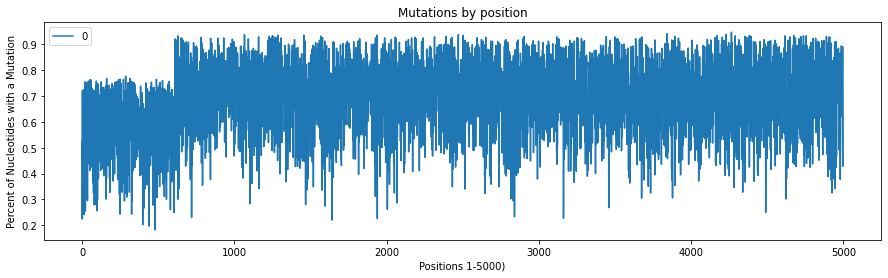

In [96]:
printPlot(startLocation = 0, endLocation = (4999), \
            figureSizeWidth = 15, figureSizeHeight = 4,\
            dataPoints = substitutionsLocals, \
            nucOrCodons = "Nucleotides")

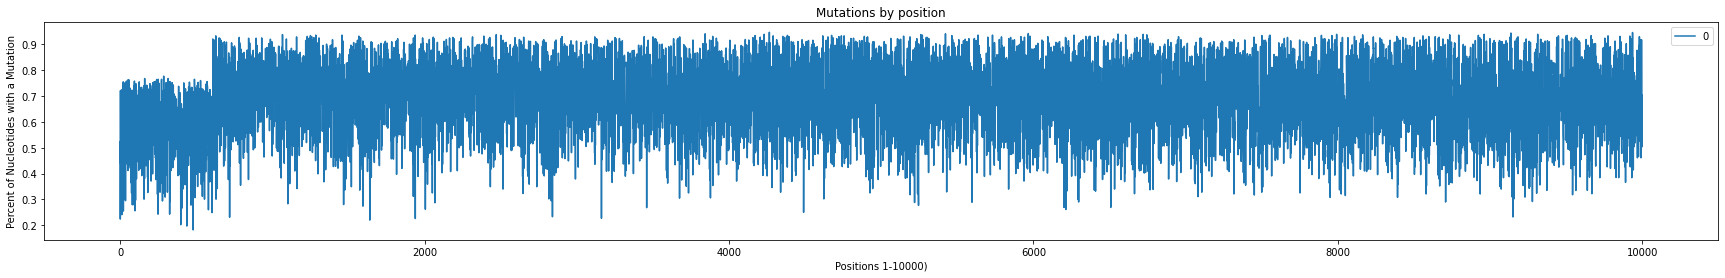

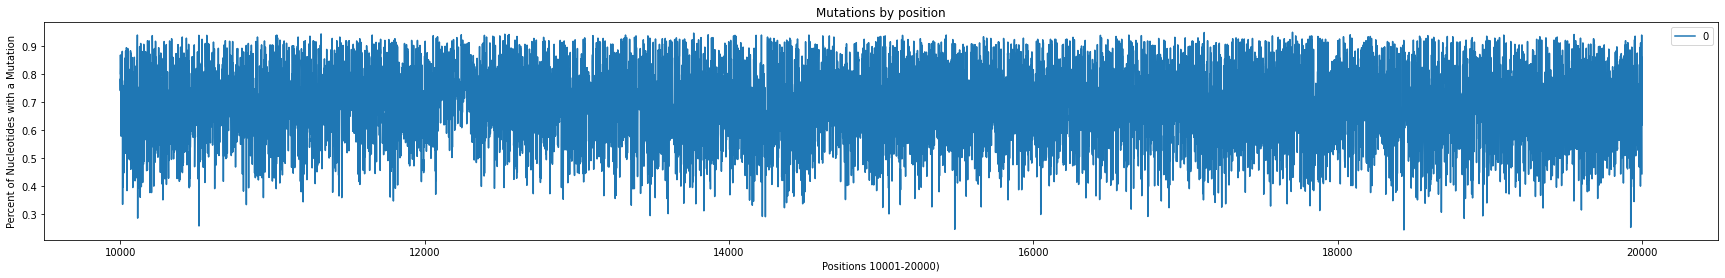

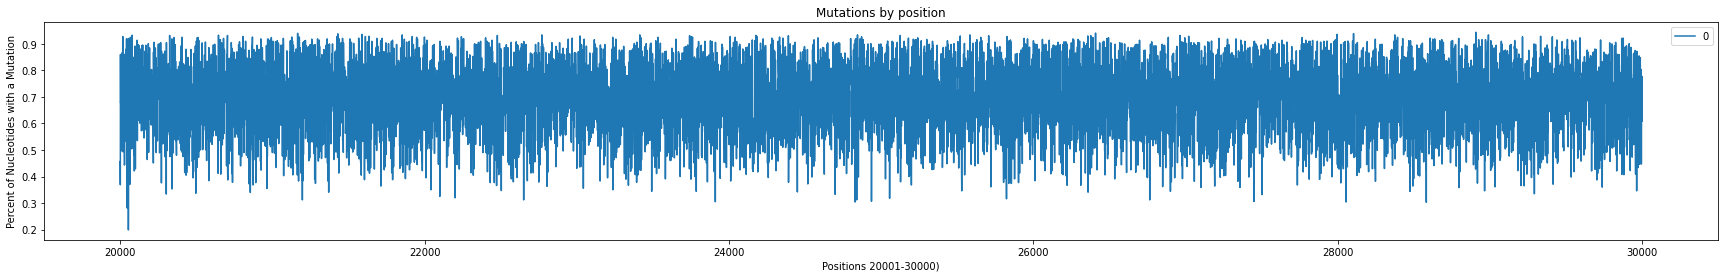

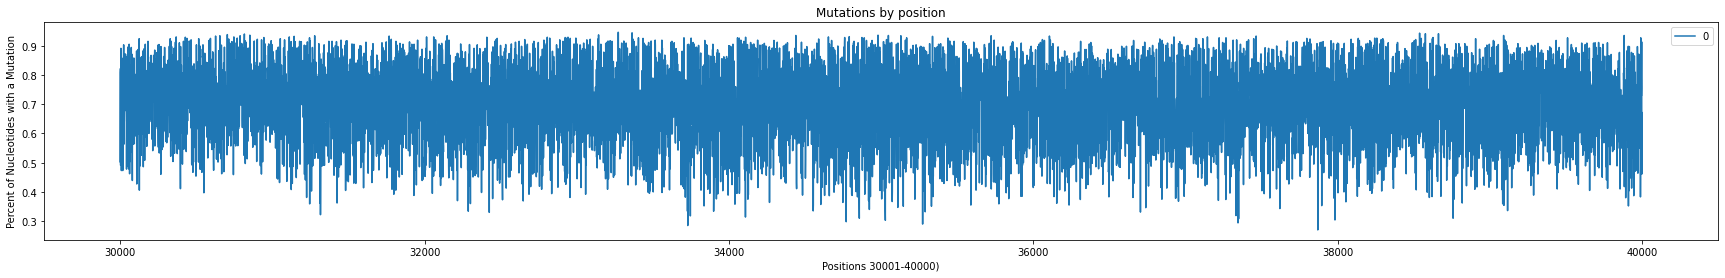

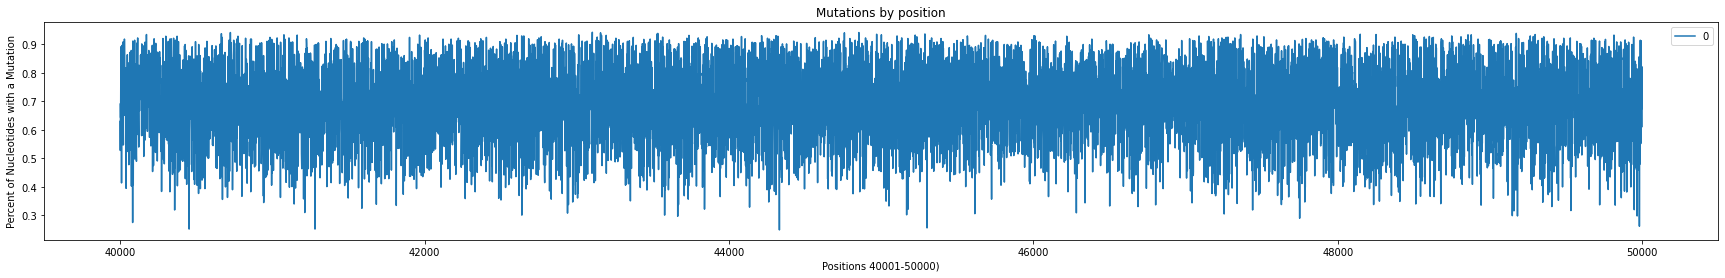

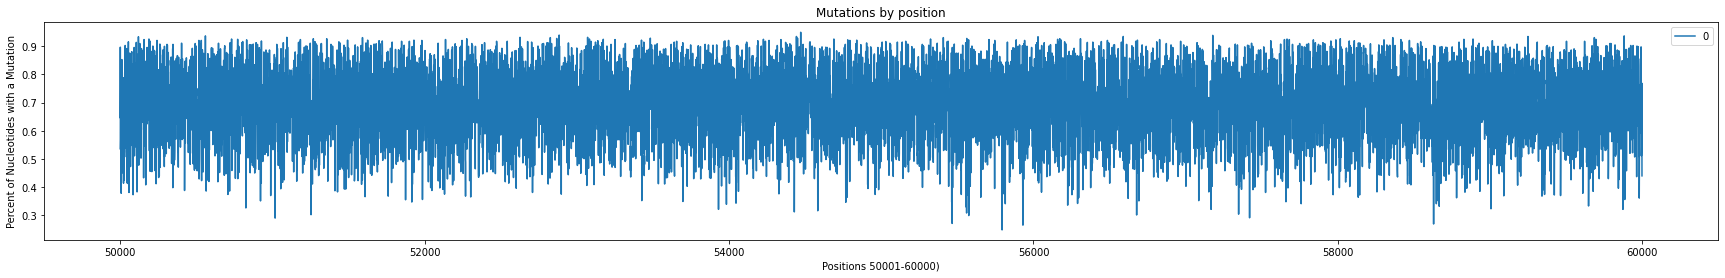

In [98]:
for i in range (0,60000,10000):
  printPlot(startLocation = i, endLocation = (i + 9999), \
            dataPoints = substitutionsLocals, \
            nucOrCodons = "Nucleotides")

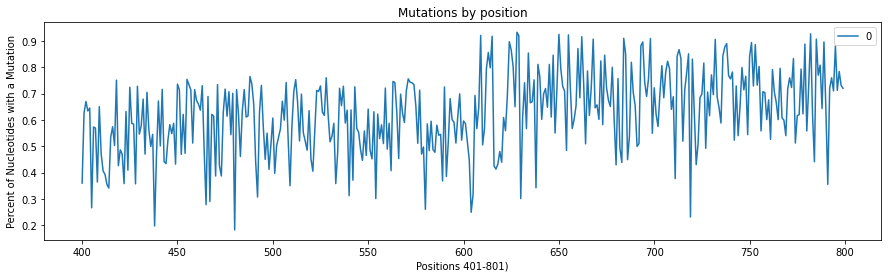

In [99]:
printPlot(startLocation = 400, endLocation = 800, \
          figureSizeWidth = 15, figureSizeHeight = 4,\
            dataPoints = substitutionsLocals, \
            nucOrCodons = "Nucleotides")

In [15]:
substitutionsCounts = [0,0,0,0,0,\
                       0,0,0,0,0,\
                       0,0,0,0,0,\
                       0,0,0,0,0]

NucleotidesRef = ["A", "C", "G", "T"]
Nucleotides = ["A", "C", "G", "T", "N"]
counter = 0
for i in NucleotidesRef:
  for j in Nucleotides:
    substitutionsCounts[counter] = findCertainSubstitution(i, j)
    counter += 1

print("----------------------------------------------------------")
for i in range(0,4,1):
  for j in range(0,5,1):
    print(" ", NucleotidesRef[i], "->", Nucleotides[j], "  ", end="")
    if j != 4:
      print("|", end="")
    else:
      print("")
  for j in range(0,5,1):
    print(" ", substitutionsCounts[5*i+ j], " ", end="")
    if j != 4:
      print("|", end="")
    else:
      print("")
  print("----------------------------------------------------------")

verifytotal = 0
for i in range (0,20,1):
  verifytotal += substitutionsCounts[i]
print("")
print(verifytotal) #59999765 is the same as above

----------------------------------------------------------
  A -> A   |  A -> C   |  A -> G   |  A -> T   |  A -> N   
  6692199  |  3160506  |  2776952  |  6402534  |  212758  
----------------------------------------------------------
  C -> A   |  C -> C   |  C -> G   |  C -> T   |  C -> N   
  3147178  |  2102260  |  1492889  |  3485326  |  111327  
----------------------------------------------------------
  G -> A   |  G -> C   |  G -> G   |  G -> T   |  G -> N   
  2780617  |  1486762  |  1718693  |  3073648  |  97196  
----------------------------------------------------------
  T -> A   |  T -> C   |  T -> G   |  T -> T   |  T -> N   
  6409121  |  3491784  |  3047512  |  8074575  |  235928  
----------------------------------------------------------

59999765


In [16]:
ChangeInNucleotides = []
def FindChangeInNucleotides(Nuc, substiutitionsCounts = substitutionsCounts):
  totalChange = 0
  for i in range (0,20,5):
    adj = Nucleotides.index(Nuc)
    totalChange += substiutitionsCounts[i + adj]
  if Nuc != "N":
    for i in range (0,20,4):
      adj = NucleotidesRef.index(Nuc)
      totalChange -= substiutitionsCounts[i + adj]
  return totalChange

for i in Nucleotides:
  print(FindChangeInNucleotides(i))

3428355
-2298859
-6795554
5008849
657209


In [17]:
def FindPercentChange(Nuc, substitutionsCounts = substitutionsCounts):
  totalNuc = sum((dataFrame1000MPoc == Nuc).astype(int).sum(axis=1))
  percentChange = FindChangeInNucleotides(Nuc, substitutionsCounts) / totalNuc
  if Nuc == "N":
    return("N/A")
  return(percentChange)

for i in Nucleotides:
  print(FindPercentChange(i))

0.1801636597392995
-0.22446918910389607
-0.7520495136921613
0.2381074936812143
N/A


##Codon Replacements

In [18]:
# the following functions were taken from course material regarding this topic
# and adapted to the current material. I did include the N's into the codons
# when the nucleotide makes no difference.

aminoAcids = ['F','L','I','M','V','S','P','T','A','Y','|','H','Q','N','K','D','E','C','W','R','G'] 
    # aa is list of amino acids
codons = [['TTT', 'TTC'], #F
      ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG', 'CTN'], #L
      ['ATT', 'ATC', 'ATA'], #I
      ['ATG'], #M
      ['GTT', 'GTC', 'GTA', 'GTG', 'GTN'], #V
      ['TCT', 'TCC', 'TCA', 'TCG', 'TCN', 'AGT', 'AGC'], #S (Start)
      ['CCT', 'CCC', 'CCA', 'CCG', 'CCN'], #P
      ['ACT', 'ACC', 'ACA', 'ACG', 'ACN'], #T
      ['GCT', 'GCC', 'GCA', 'GCG', 'GCN'], #A
      ['TAT', 'TAC'], #Y
      ['TAA', 'TAG', 'TGA'], #| (Stop)
      ['CAT', 'CAC'], #H
      ['CAA', 'CAG'], #Q
      ['AAT', 'AAC'], #N
      ['AAA', 'AAG'], #K
      ['GAT', 'GAC'], #D
      ['GAA', 'GAG'], #E
      ['TGT', 'TGC'], #C
      ['TGG'], #W
      ['CGT', 'CGC', 'CGA', 'CGG', 'CGN', 'AGA', 'AGG'], #R
      ['GGT', 'GGC', 'GGA', 'GGG', 'GGN']] #G

def dicDNA2aa(codons = codons, aminoAcids = aminoAcids):
    aaDIC = {} # empty dictionary
    for i in range(len(codons)):
        for j in range(len(codons[i])):
            aaDIC[codons[i][j]] = aminoAcids[i]
    return aaDIC

In [19]:
#Read in file
infile = open("/content/drive/My Drive/QBIO_401_notes/sequences.fasta")
# Time Request (Not Necessary, but I appreciate it)
import time
start_time = time.time()
nospace = ""
# Set up variables ahead of time
genome = []
dictionaryOfGenomesCodons = {}
counter = 0
counter2 = 0
# Go through file line by line
for line in infile:
  # Capture name of the genome (Accesssion)
        if re.match(">", line):
          # Isolate Accession from excess information
          linelistforkey = line.split(" ")
          linelistforkey2 = linelistforkey[0].split(">")[1]
          linelistforkey3 = linelistforkey2.split(".")[0]
          key = linelistforkey3
          # If name is one of the 1000 US genomes, print key and continue
          # If not, set counter so iterations skip storing information
          if (key in listOfAmericanSequences) == False:
            counter = 1001
          else:
            counter2 += 1
            # print(key)
            counter = 0
          # Skip this line so it is not read into the dataframe
          continue
        # start the count
        counter += 1
        linelist = list(line)
        # Check if we have reached 60,000 bases, when we have, store 
        # the bases in a dictionary with a key that is the Accession ID
        if counter == 1001:
          dictionaryOfGenomesCodons[key] = genome.copy()
          # Reset genome list
          genome.clear()
        # If we are beyond 60,000 bases 
        # or do not care about our Accesssion ID, ignore
        elif counter > 1001:
          continue
        # If we are short of 60,000, add codons to our empty list
        elif len(line) == 61:
          for i in range(0,60,3):
            # Implented .join so the cells would contain strings
            # Instead of lists
            genome.append(nospace.join(linelist[i:i + 3]))
# Close file
infile.close()
# Convert dictionary to dataframe
dataFrame1000MPocCodons = pd.DataFrame.from_dict(dictionaryOfGenomesCodons)
# Print time
print("--- %s seconds ---" % (time.time() - start_time))

--- 28.93907904624939 seconds ---


In [20]:
dataFrame1000MPocCodons

OP820450 OP820451 OP820452 OP820453 OP820454 OP820455 OP820456 OP820457  \
0          TTA      TTA      AAT      TTA      TTA      TTA      TTA      TTA   
1          CAG      CAG      ATT      CAG      CAG      CAG      CAG      CAG   
2          ATC      ATC      AAC      ATC      ATC      ATC      ATC      ATC   
3          ATT      ATT      TAT      ATT      ATT      ATT      ATT      ATT   
4          TAT      TAT      ATA      TAT      TAT      TAT      TAT      TAT   
...        ...      ...      ...      ...      ...      ...      ...      ...   
19995      GTA      GTA      ATG      GTA      GTA      TAC      GTA      GTA   
19996      CGA      CGA      GTC      CGA      CGA      GAT      CGA      CGA   
19997      TCC      TCC      CTT      TCC      TCC      CCT      TCC      TCC   
19998      TAC      TAC      CCT      TAC      TAC      ACA      TAC      TAC   
19999      ATA      ATA      TCT      ATA      ATA      TAT      ATA      ATA   

      OP820458 OP820459  ... ON959136 ON954773 ON674051 ON675438 ON676703  \
0          TTA      TTA  ...      ATT      ATT      TAT      ATT      TAT   
1          CAG      CAG  ...      TTA      TTA      TAT      TTA      TAT   
2          ATC      ATC  ...      CTA      CTA      ATT      CTA      ATT   
3          ATT      ATT  ...      TTT      TTT      TTA      TTT      TTA   
4          TAT      TAT  ...      TAT      TAT      CTA      TAT      CTA   
...        ...      ...  ...      ...      ...      ...      ...      ...   
19995      GTA      CGT  ...      TCG      TCG      TTT      AAC      TTT   
19996      CGA      ACG  ...      TTA      TTA      ATA      TCG      ATA   
19997      TCC      ATC  ...      GTT      GTT      AAC      CTT      AAC   
19998      TAC      CTA  ...      TGG      TGG      TCG      AAT      TCG   
19999      ATA      CAT  ...      AAT      AAT      CTT      ATC      CTT   

      ON676704 ON676705 ON676706 ON627808 ON563414  
0          TAT      ATT      GAC      ATT      TTT  
1          TAT      TTA      CGT      ATA      TAG  
2          ATT      CTA      AGG      TTT      TAC  
3          TTA      TTT      AAA      TAC      ATT  
4          CTA      TAT      CTC      TAT      AAT  
...        ...      ...      ...      ...      ...  
19995      TTT      AAC      ACC      TAT      TTT  
19996      ATA      TCG      ATC      AAA      CCC  
19997      AAC      CTT      TAC      CTC      AAA  
19998      TCG      AAT      CAT      GCT      TAG  
19999      CTT      ATC      AAT      TAA      TTT  

[20000 rows x 1000 columns]

In [21]:
#Read in file
infile = open("/content/drive/My Drive/QBIO_401_notes/sequences.fasta")
# Time Request (Not Necessary, but I appreciate it)
import time
start_time = time.time()
nospace = ""
# Set up variables ahead of time
genome.clear()
dictionaryForReferenceCodons = {}
counter = 0
counter2 = 0
# Go through file line by line
for line in infile:
  # Look for reference Accession
        if re.match(">NC_06338", line):
          # Isolate Accession from excess information
          linelistforkey = line.split(" ")
          linelistforkey2 = linelistforkey[0].split(">")[1]
          linelistforkey3 = linelistforkey2.split(".")[0]
          key = linelistforkey3
          # Skip this line so it is not read into the dataframe
          continue
        # start the count
        counter += 1
        linelist = list(line)
        # Check if we have reached 60,000 bases, when we have, store 
        # the bases in a dictionary with a key that is the Accession ID
        if counter == 1001:
          dictionaryForReferenceCodons[key] = genome.copy()
          # Reset genome list
          genome.clear()
          break
        # If we are beyond 60,000 bases, ignore
        elif counter > 1001:
          continue
        # If we are short of 60,000, add codons to our empty list
        elif len(line) == 61:
          for i in range(0,60,3):
            # Implented .join so the cells would contain strings
            # Instead of lists
            genome.append(nospace.join(linelist[i:i + 3]))
# Close file
infile.close()
# Convert dictionary to dataframe
dataFrameReferenceCodons = pd.DataFrame.from_dict(dictionaryForReferenceCodons)
# Print time
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.014795780181884766 seconds ---


In [22]:
dataFrameReferenceCodons

NC_063383
0           ATT
1           TTA
2           CTA
3           TTT
4           TAT
...         ...
19995       TAA
19996       ACT
19997       CGC
19998       TTA
19999       ATA

[20000 rows x 1 columns]

In [23]:
def findCodonFrequencies(dataSet = dataFrame1000MPocCodons):
  CodonFrequencies = []
  counter = 0
  for i in codons:
    listOfCodonsWithFiller = ["These", "Entries", "Should",\
                            "Not Trigger", "The Sequence", "Of Or","Sequences"]
    counter2 = 0
    for j in i:
      listOfCodonsWithFiller[counter2] = j
      counter2 += 1
    withCodon = ((dataSet == listOfCodonsWithFiller[0]) |\
                (dataSet == listOfCodonsWithFiller[1]) |\
                (dataSet == listOfCodonsWithFiller[2]) |\
                (dataSet == listOfCodonsWithFiller[3]) |\
                (dataSet == listOfCodonsWithFiller[4]) |\
                (dataSet == listOfCodonsWithFiller[5]) |\
                (dataSet == listOfCodonsWithFiller[6])).astype(int).sum(axis=1)    
    CodonFrequencies.append(sum(withCodon))
  print(CodonFrequencies)
  return CodonFrequencies

In [24]:
CodonFrequencies1000 = findCodonFrequencies()
CodonFrequenciesRef = findCodonFrequencies(dataFrameReferenceCodons)
print(sum(CodonFrequencies1000))
print(sum(CodonFrequenciesRef))

# Note: CodonFrequencies1000 is less than 20,000,000. This is a result of the 
# amount of N's (as well as R,S,W,M, and Y) in the 1,000 genomes not found
# in the reference genome. As a result of N being a placeholder for a genome,
# we do not skip it within referencing but we also can't gaurantee the amino
# acid created as a result of that codon. Where possible, I have added in the
# N's, but there are still cases that escape which cause this inequality.

[1303875, 2092704, 2130591, 406285, 1078112, 1829744, 586478, 1036656, 411345, 1256155, 1335019, 680588, 511718, 1030242, 797927, 609515, 463966, 542543, 197339, 1026960, 450507]
[1345, 2146, 2187, 425, 1073, 1777, 588, 1034, 402, 1279, 1413, 675, 498, 1021, 812, 608, 444, 551, 217, 1067, 438]
19778269
20000


In [25]:
# Verified that none of the words I used would be found. As expected,
# This cell returns 0

# listOfCodonsWithFiller = ["These", "Entries", "Should",\
#                           "Not Trigger", "The Sequence", "Of Or","Sequences"]
# withCodon = ((dataFrame1000MPocCodons == listOfCodonsWithFiller[0]) |\
#             (dataFrame1000MPocCodons == listOfCodonsWithFiller[1]) |\
#             (dataFrame1000MPocCodons == listOfCodonsWithFiller[2]) |\
#             (dataFrame1000MPocCodons == listOfCodonsWithFiller[3]) |\
#             (dataFrame1000MPocCodons == listOfCodonsWithFiller[4]) |\
#             (dataFrame1000MPocCodons == listOfCodonsWithFiller[5])).astype(int).sum(axis=1)   
# print(sum(withCodon))

# ALso verified list has all 64 Codons

In [26]:
# codons = [['TTT', 'TTC'], #F
withoutCodonF = ((dataFrame1000MPocCodons != codons[0][0]) &\
              (dataFrame1000MPocCodons != codons[0][1])).astype(int).sum(axis=1)   
#       ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG', 'CTN'], #L
withoutCodonL = ((dataFrame1000MPocCodons != codons[1][0]) &\
              (dataFrame1000MPocCodons != codons[1][1]) &\
              (dataFrame1000MPocCodons != codons[1][2]) &\
              (dataFrame1000MPocCodons != codons[1][3]) &\
              (dataFrame1000MPocCodons != codons[1][4]) &\
              (dataFrame1000MPocCodons != codons[1][5]) &\
              (dataFrame1000MPocCodons != codons[1][6])).astype(int).sum(axis=1)   
#       ['ATT', 'ATC', 'ATA'], #I
withoutCodonI = ((dataFrame1000MPocCodons != codons[2][0]) &\
              (dataFrame1000MPocCodons != codons[2][1]) &\
              (dataFrame1000MPocCodons != codons[2][2])).astype(int).sum(axis=1)   
#       ['ATG'], #M
withoutCodonM = ((dataFrame1000MPocCodons != codons[3][0])).astype(int).sum(axis=1)   
#       ['GTT', 'GTC', 'GTA', 'GTG', 'GTN], #V
withoutCodonV = ((dataFrame1000MPocCodons != codons[4][0]) &\
              (dataFrame1000MPocCodons != codons[4][1]) &\
              (dataFrame1000MPocCodons != codons[4][2]) &\
              (dataFrame1000MPocCodons != codons[4][3]) &\
              (dataFrame1000MPocCodons != codons[4][4])).astype(int).sum(axis=1)   
#       ['TCT', 'TCC', 'TCA', 'TCG', 'TCN', 'AGT', 'AGC'], #S (Start)
withoutCodonS = ((dataFrame1000MPocCodons != codons[5][0]) &\
              (dataFrame1000MPocCodons != codons[5][1]) &\
              (dataFrame1000MPocCodons != codons[5][2]) &\
              (dataFrame1000MPocCodons != codons[5][3]) &\
              (dataFrame1000MPocCodons != codons[5][4]) &\
              (dataFrame1000MPocCodons != codons[5][5]) &\
              (dataFrame1000MPocCodons != codons[5][6])).astype(int).sum(axis=1)   
#       ['CCT', 'CCC', 'CCA', 'CCG', 'CCN'], #P
withoutCodonP = ((dataFrame1000MPocCodons != codons[6][0]) &\
              (dataFrame1000MPocCodons != codons[6][1]) &\
              (dataFrame1000MPocCodons != codons[6][2]) &\
              (dataFrame1000MPocCodons != codons[6][3]) &\
              (dataFrame1000MPocCodons != codons[6][4])).astype(int).sum(axis=1)   
#       ['ACT', 'ACC', 'ACA', 'ACG', 'ACN'], #T
withoutCodonT = ((dataFrame1000MPocCodons != codons[7][0]) &\
              (dataFrame1000MPocCodons != codons[7][1]) &\
              (dataFrame1000MPocCodons != codons[7][2]) &\
              (dataFrame1000MPocCodons != codons[7][3]) &\
              (dataFrame1000MPocCodons != codons[7][4])).astype(int).sum(axis=1)   
#       ['GCT', 'GCC', 'GCA', 'GCG', 'GCN'], #A
withoutCodonA = ((dataFrame1000MPocCodons != codons[8][0]) &\
              (dataFrame1000MPocCodons != codons[8][1]) &\
              (dataFrame1000MPocCodons != codons[8][2]) &\
              (dataFrame1000MPocCodons != codons[8][3]) &\
              (dataFrame1000MPocCodons != codons[8][4])).astype(int).sum(axis=1)   
#       ['TAT', 'TAC'], #Y
withoutCodonY = ((dataFrame1000MPocCodons != codons[9][0]) &\
              (dataFrame1000MPocCodons != codons[9][1])).astype(int).sum(axis=1)   
#       ['TAA', 'TAG', 'TGA'], #| (Stop)
withoutCodonStop = ((dataFrame1000MPocCodons != codons[10][0]) &\
              (dataFrame1000MPocCodons != codons[10][1]) &\
              (dataFrame1000MPocCodons != codons[10][2])).astype(int).sum(axis=1)   
#       ['CAT', 'CAC'], #H
withoutCodonH = ((dataFrame1000MPocCodons != codons[11][0]) &\
              (dataFrame1000MPocCodons != codons[11][1])).astype(int).sum(axis=1)   
#       ['CAA', 'CAG'], #Q
withoutCodonQ = ((dataFrame1000MPocCodons != codons[12][0]) &\
              (dataFrame1000MPocCodons != codons[12][1])).astype(int).sum(axis=1)   
#       ['AAT', 'AAC'], #N
withoutCodonN = ((dataFrame1000MPocCodons != codons[13][0]) &\
              (dataFrame1000MPocCodons != codons[13][1])).astype(int).sum(axis=1)  
#       ['AAA', 'AAG'], #K
withoutCodonK = ((dataFrame1000MPocCodons != codons[14][0]) &\
              (dataFrame1000MPocCodons != codons[14][1])).astype(int).sum(axis=1)  
#       ['GAT', 'GAC'], #D
withoutCodonD = ((dataFrame1000MPocCodons != codons[15][0]) &\
              (dataFrame1000MPocCodons != codons[15][1])).astype(int).sum(axis=1)   
#       ['GAA', 'GAG'], #E
withoutCodonE = ((dataFrame1000MPocCodons != codons[16][0]) &\
              (dataFrame1000MPocCodons != codons[16][1])).astype(int).sum(axis=1)   
#       ['TGT', 'TGC'], #C
withoutCodonC = ((dataFrame1000MPocCodons != codons[17][0]) &\
              (dataFrame1000MPocCodons != codons[17][1])).astype(int).sum(axis=1)  
#       ['TGG'], #W
withoutCodonW = ((dataFrame1000MPocCodons != codons[18][0])).astype(int).sum(axis=1)   
#       ['CGT', 'CGC', 'CGA', 'CGG', 'CGN', 'AGA', 'AGG'], #R
withoutCodonR = ((dataFrame1000MPocCodons != codons[19][0]) &\
              (dataFrame1000MPocCodons != codons[19][1]) &\
              (dataFrame1000MPocCodons != codons[19][2]) &\
              (dataFrame1000MPocCodons != codons[19][3]) &\
              (dataFrame1000MPocCodons != codons[19][4]) &\
              (dataFrame1000MPocCodons != codons[19][5]) &\
              (dataFrame1000MPocCodons != codons[19][6])).astype(int).sum(axis=1)   
#       ['GGT', 'GGC', 'GGA', 'GGG', 'GGN']] #G
withoutCodonG = ((dataFrame1000MPocCodons != codons[20][0]) &\
              (dataFrame1000MPocCodons != codons[20][1]) &\
              (dataFrame1000MPocCodons != codons[20][2]) &\
              (dataFrame1000MPocCodons != codons[20][3]) &\
              (dataFrame1000MPocCodons != codons[20][4])).astype(int).sum(axis=1)   
WithoutCodonsList = [withoutCodonF, withoutCodonL, withoutCodonI,\
                     withoutCodonM, withoutCodonV, withoutCodonS,\
                     withoutCodonP, withoutCodonT, withoutCodonA,\
                     withoutCodonY, withoutCodonStop, withoutCodonH,\
                     withoutCodonQ, withoutCodonN, withoutCodonK,\
                     withoutCodonD, withoutCodonE, withoutCodonC,\
                     withoutCodonW, withoutCodonR, withoutCodonG]

In [27]:
# Exception put in for first CA genome

# When working to build the box plots seen later in this document
# There was inititally an issue with the dictionary to data frame conversion 
# That all but 1 nucleotide and 1 codon to be tracker within the CA Reference.
# This was remeidied by finding the location of the non-A,T,G,C character 
# (using the code below) and creating an exception in earlier code so this 
# point could be captured.

ON676703List = dataFrame1000MPoc['ON676703'].tolist()
print(ON676703List.index("N"))
print(ON676703List[596])
print(ON676703List[597])
print(ON676703List[598])
print(ON676703List[599])
print(ON676703List[600])

withoutCodonANT = (dataFrame1000MPocCodons != "ANT").astype(int).sum(axis=1)

598
T
A
N
T
T


In [28]:
def findTotalSubstitutionsCodons(WithoutCodonsList = WithoutCodonsList,\
                             RefGenome = dataFrameReferenceCodons["NC_063383"]):
  totalSubstitutions = 0
  counter = 0
  for i in RefGenome:
    for j in range(0,21,1):
      if i in codons[j]:
        totalSubstitutions += WithoutCodonsList[j][counter]
    counter += 1  
    # if counter%1000 == 0:
    #   print(counter)
  return totalSubstitutions

def breakdownOfSubstitutionsCodons(WithoutCodonsList = WithoutCodonsList,\
                             RefGenome = dataFrameReferenceCodons["NC_063383"]):
  totalSubstitutions = 0
  counter = 0
  SubLocals = []
  for i in RefGenome:
    for j in range(0,21,1):
      if i in codons[j]:
        SubLocals.append(WithoutCodonsList[j][counter])
    if i in ['ANT']:
      SubLocals.append(withoutCodonANT[counter])
    counter += 1  
    # if counter%1000 == 0:
    #   print(counter)
  return SubLocals

print(findTotalSubstitutionsCodons())
substitutionsLocationsCodons = []
substitutionsLocationsCodons = breakdownOfSubstitutionsCodons()
substitutionsLocationsCodons = [x / 1000 for x in substitutionsLocationsCodons]
substitutionsLocalsCodons = pd.DataFrame(substitutionsLocationsCodons)

17940710


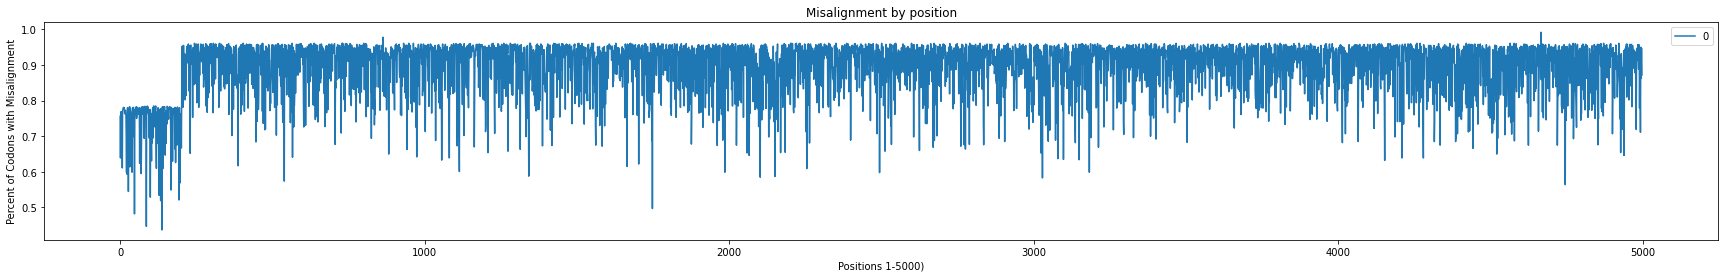

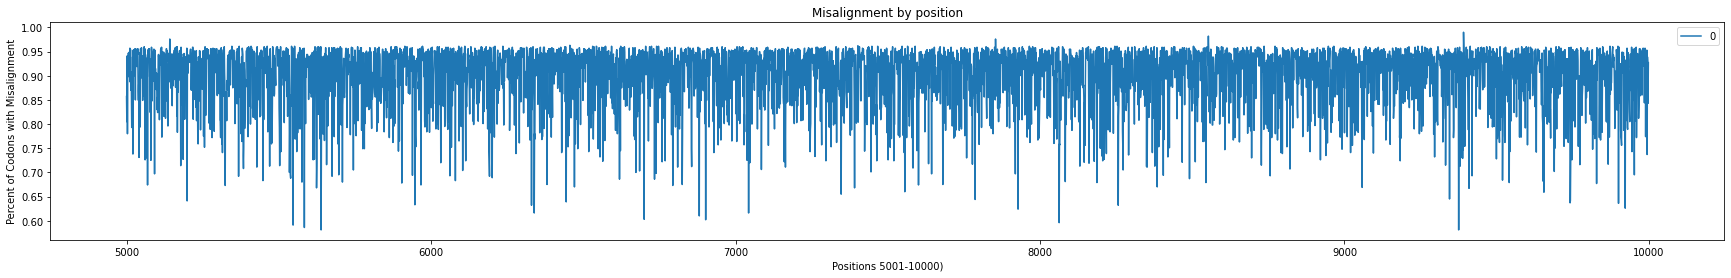

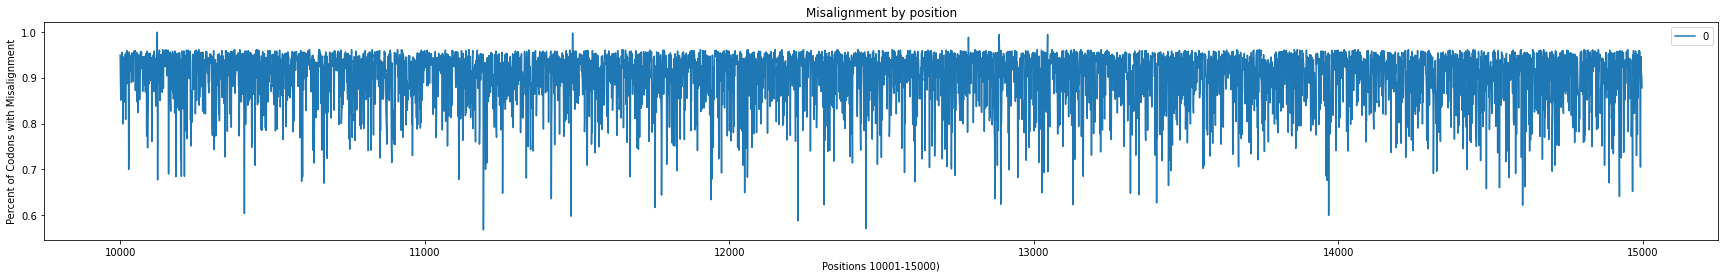

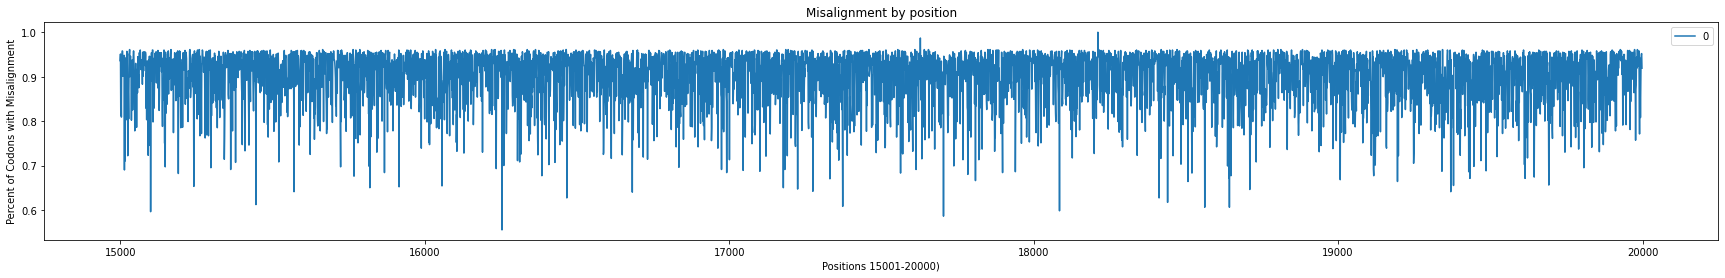

In [29]:
for i in range (0,20000,5000):
  printPlot(startLocation = i, endLocation = (i + 4999), \
            dataPoints = substitutionsLocalsCodons, \
            nucOrCodons = "Codons")

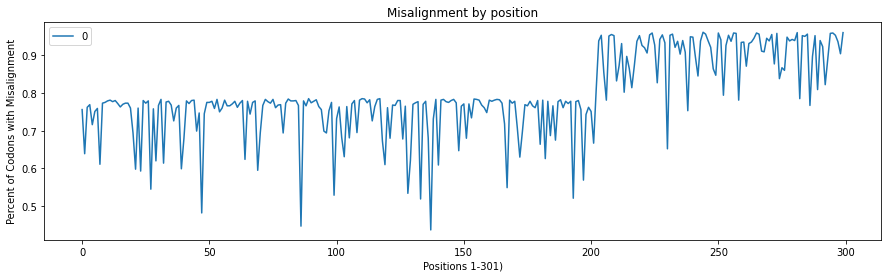

In [30]:
printPlot(startLocation = 0, endLocation = 300, \
          figureSizeWidth = 15, figureSizeHeight = 4,\
            dataPoints = substitutionsLocalsCodons, \
            nucOrCodons = "Codons")

# US Comparisons (1,000 Genomes)

## Compared Against First US (In MA)

In [31]:
print(findTotalSubstitutions(RefGenome = dataFrame1000MPoc["ON563414"]))
substitutionsLocationsUS = []
substitutionsLocationsUS = breakdownOfSubstitutions(RefGenome = \
                                                  dataFrame1000MPoc["ON563414"])
substitutionsLocationsUS = [x / 1000 for x in \
                                  substitutionsLocationsUS]
substitutionsLocalsUS = pd.DataFrame(substitutionsLocationsUS)

39253904


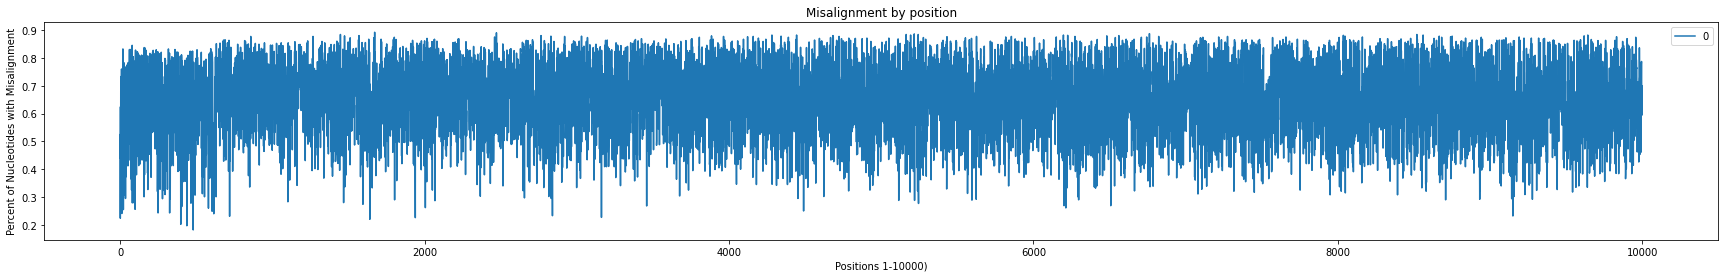

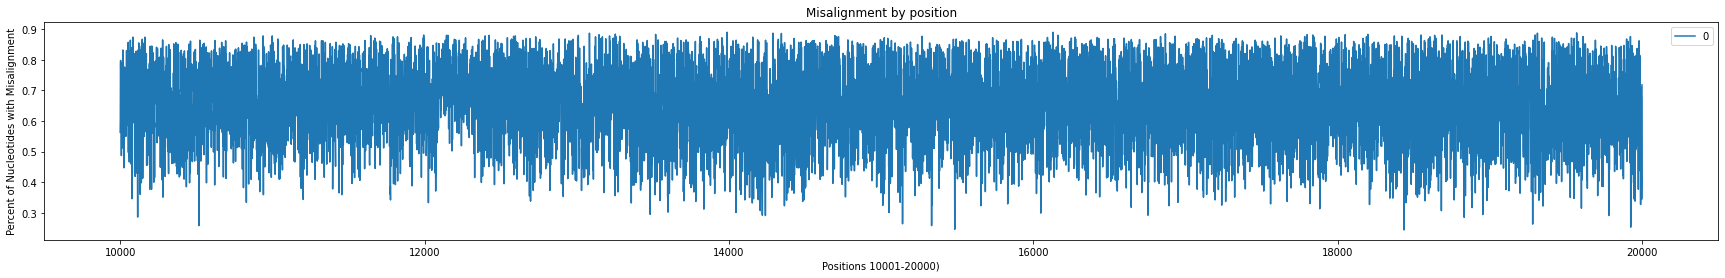

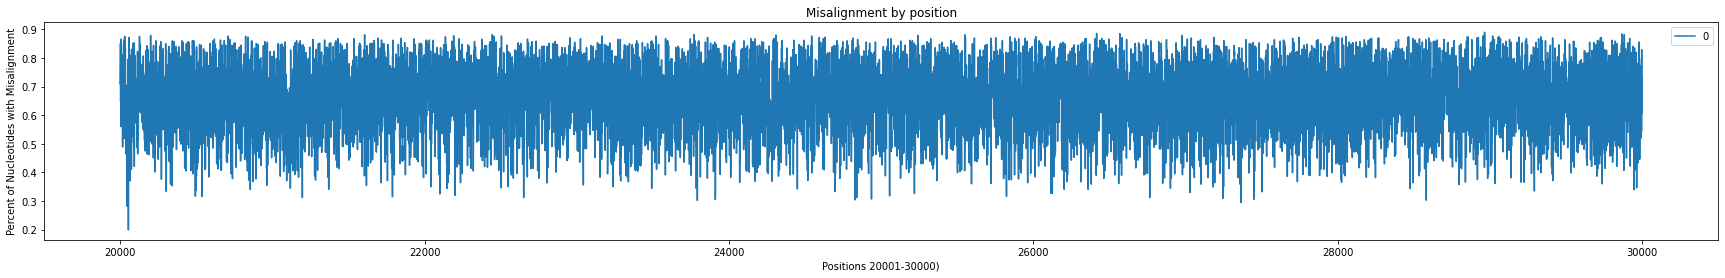

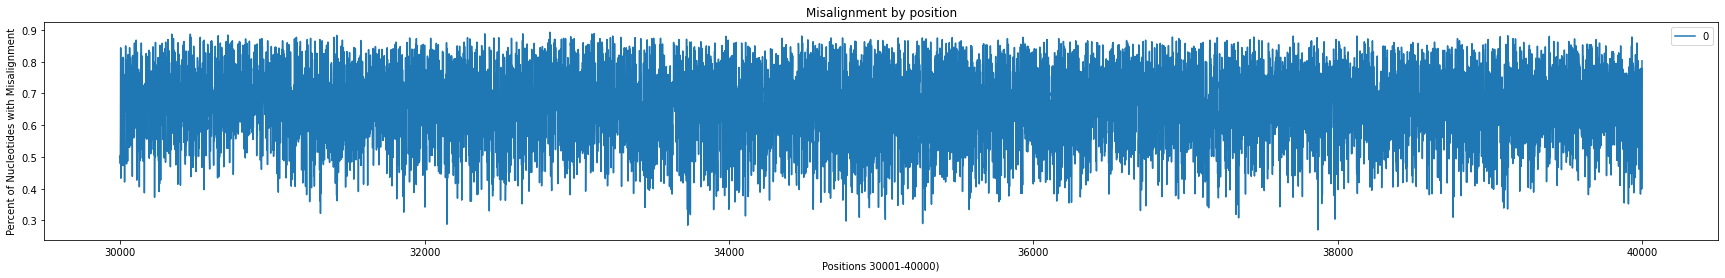

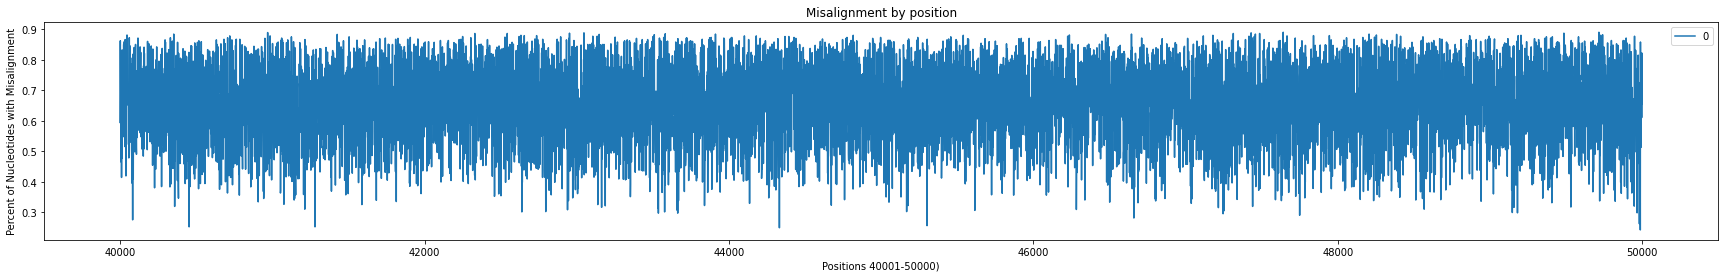

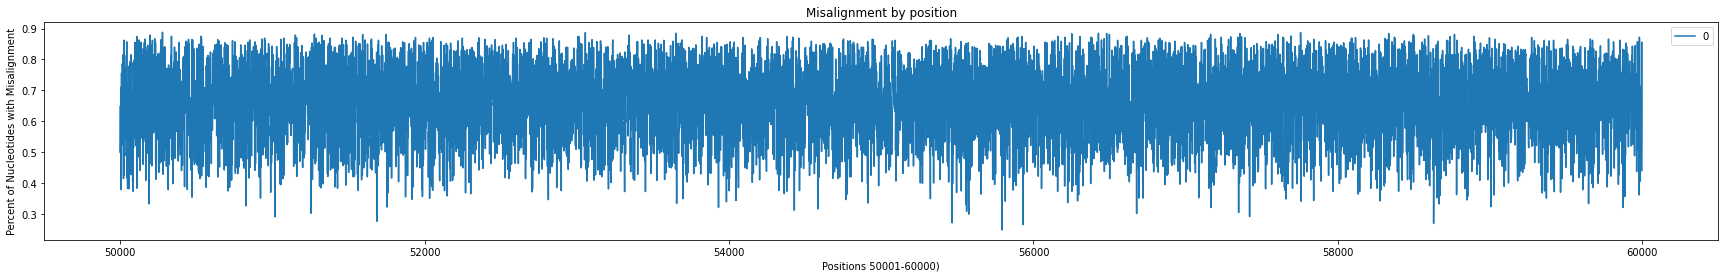

In [32]:
for i in range (0,60000,10000):
  printPlot(startLocation = i, endLocation = (i + 9999), \
            dataPoints = substitutionsLocalsUS, \
            nucOrCodons = "Nucleotides")

In [33]:
print(findTotalSubstitutionsCodons(RefGenome = \
                                          dataFrame1000MPocCodons["ON563414"]))
substitutionsLocationsCodonsUS = []
substitutionsLocationsCodonsUS = breakdownOfSubstitutionsCodons(RefGenome = \
                                           dataFrame1000MPocCodons["ON563414"])
substitutionsLocationsCodonsUS = [x / 1000 for x in \
                                  substitutionsLocationsCodonsUS]
substitutionsLocalsCodonsUS = pd.DataFrame(substitutionsLocationsCodonsUS)

16980270


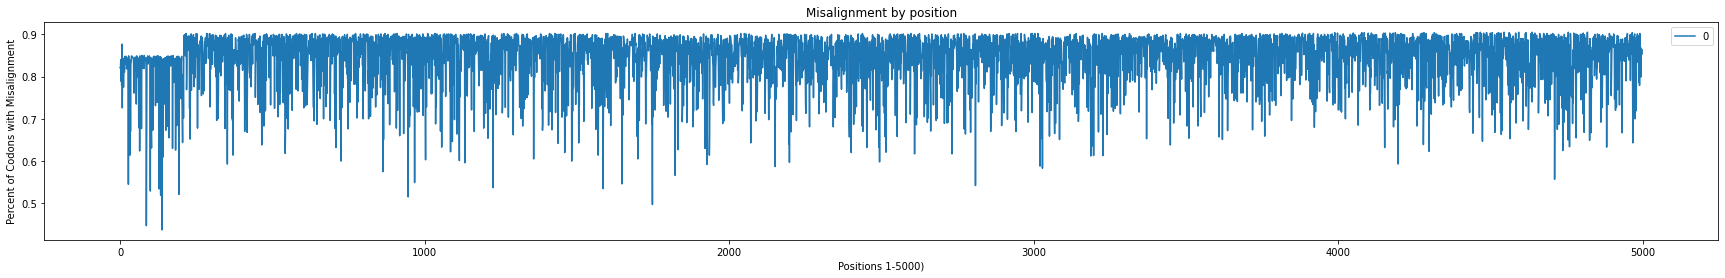

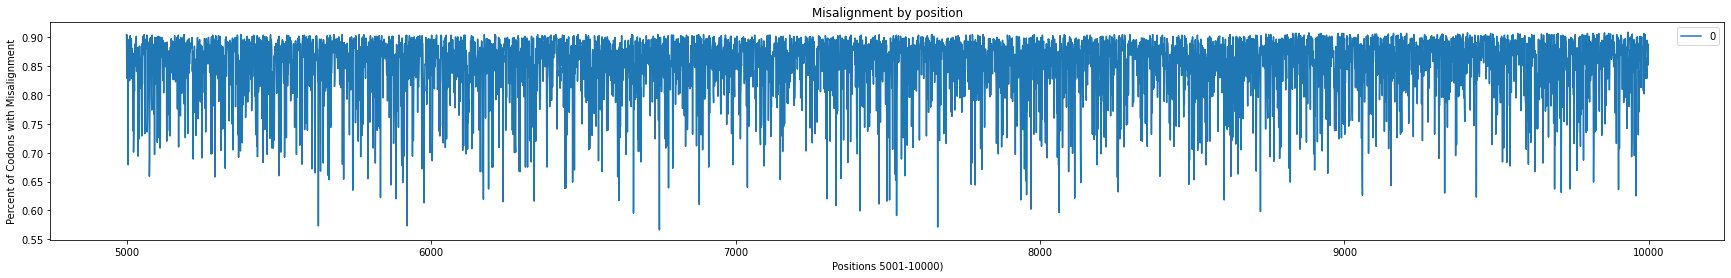

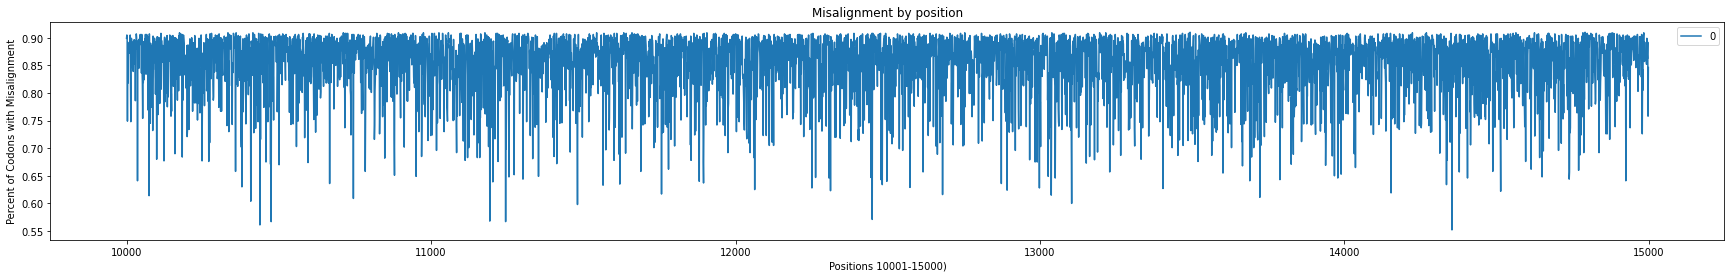

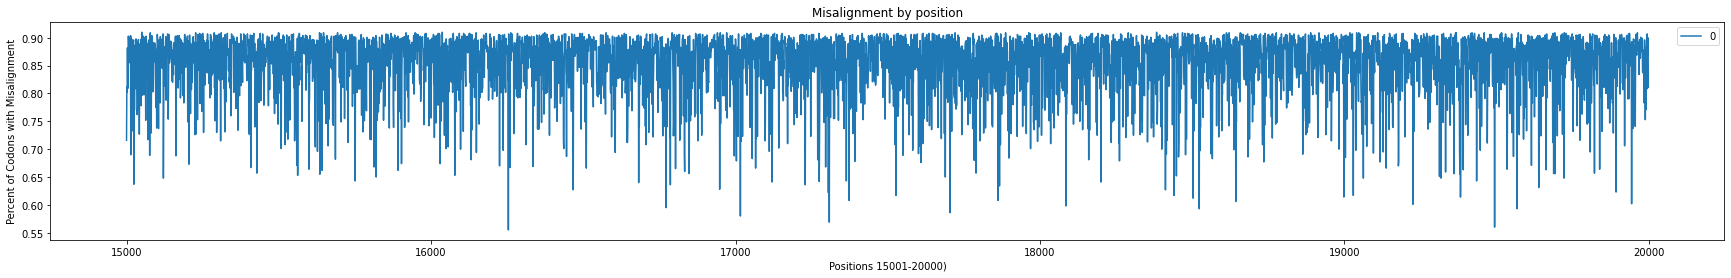

In [34]:
for i in range (0,20000,5000):
  printPlot(startLocation = i, endLocation = (i + 4999), \
            dataPoints = substitutionsLocalsCodonsUS, \
            nucOrCodons = "Codons")

## First Mapped Occurance in California

In [35]:
print(findTotalSubstitutions(RefGenome = dataFrame1000MPoc["ON676703"]))
substitutionsLocationsUS2 = []
substitutionsLocationsUS2 = breakdownOfSubstitutions\
                                    (RefGenome = dataFrame1000MPoc["ON676703"])
substitutionsLocationsUS2 = [x / 1000 for x in \
                                  substitutionsLocationsUS2]                                    
substitutionsLocalsUS2 = pd.DataFrame(substitutionsLocationsUS2)

43022710


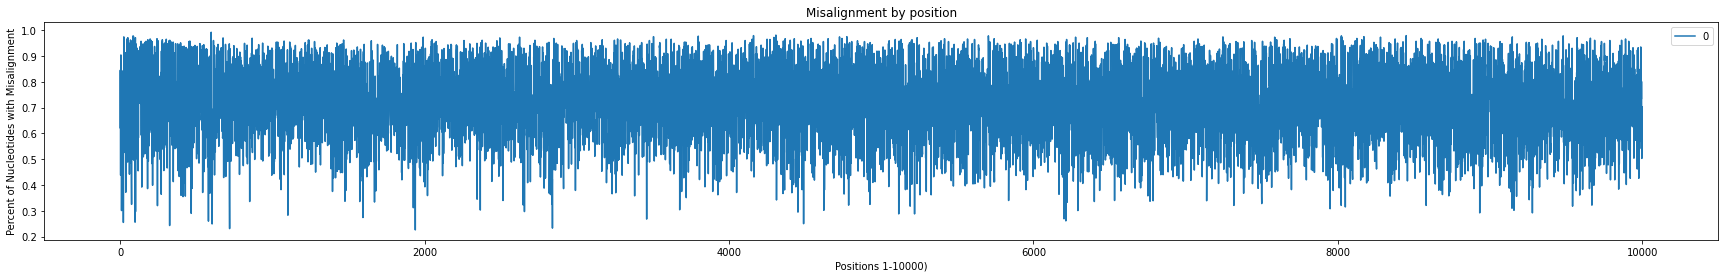

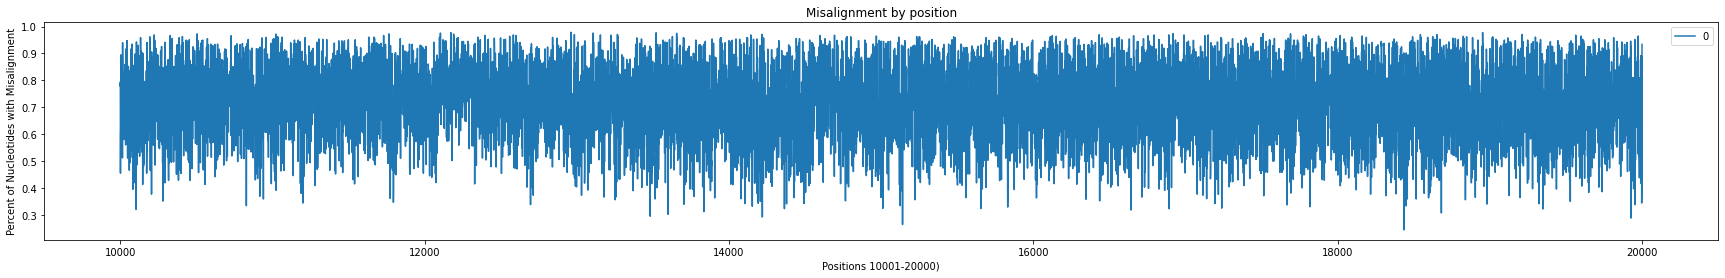

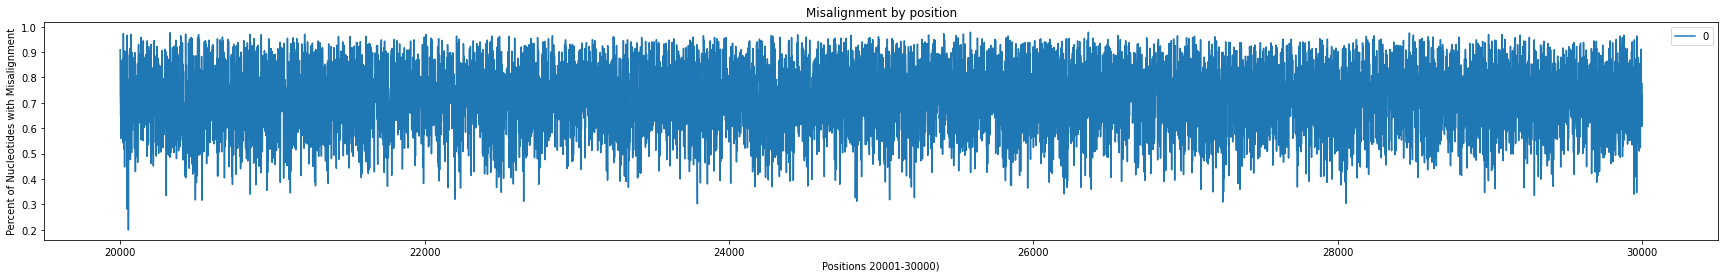

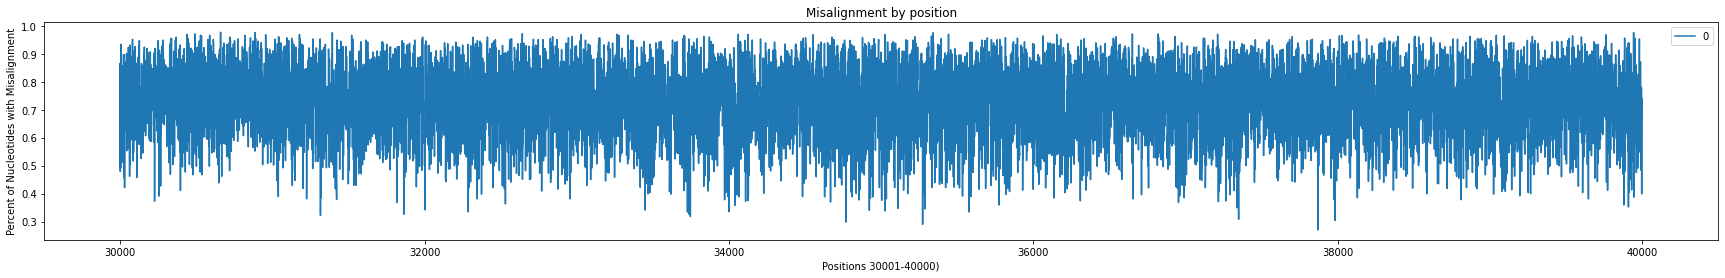

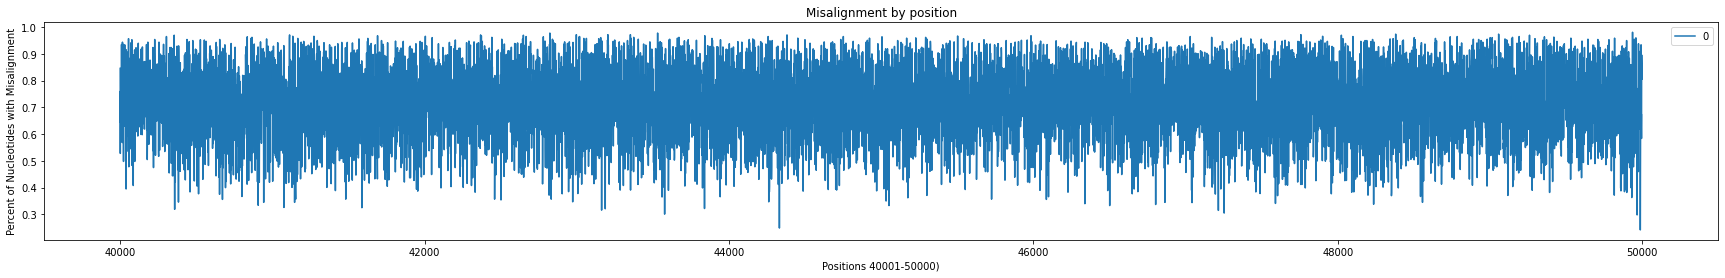

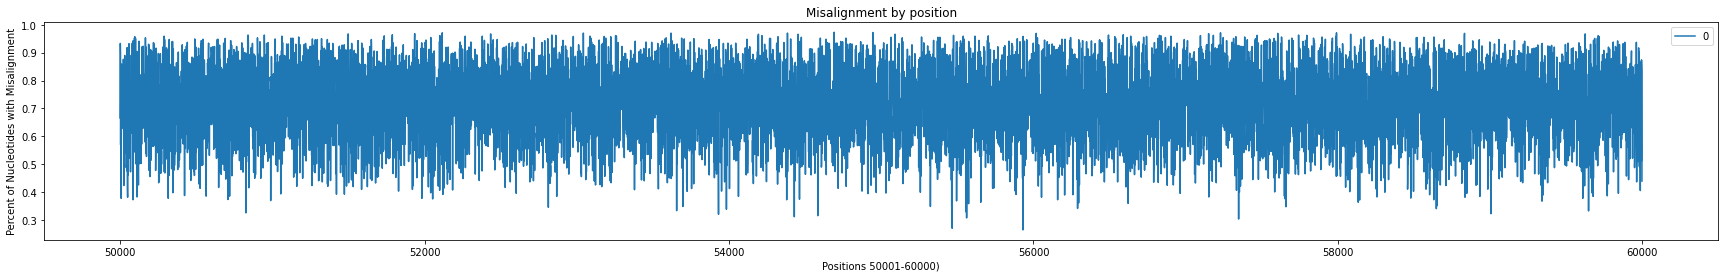

In [36]:
for i in range (0,60000,10000):
  printPlot(startLocation = i, endLocation = (i + 9999), \
            dataPoints = substitutionsLocalsUS2, \
            nucOrCodons = "Nucleotides")

In [37]:
print(findTotalSubstitutionsCodons(RefGenome = \
                                   dataFrame1000MPocCodons["ON676703"]))
substitutionsLocationsCodonsUS2 = []
substitutionsLocationsCodonsUS2 = \
breakdownOfSubstitutionsCodons(RefGenome = dataFrame1000MPocCodons["ON676703"])
substitutionsLocationsCodonsUS2 = [x / 1000 for x in \
                                  substitutionsLocationsCodonsUS2]
substitutionsLocalsCodonsUS2 = pd.DataFrame(substitutionsLocationsCodonsUS2)

18649458


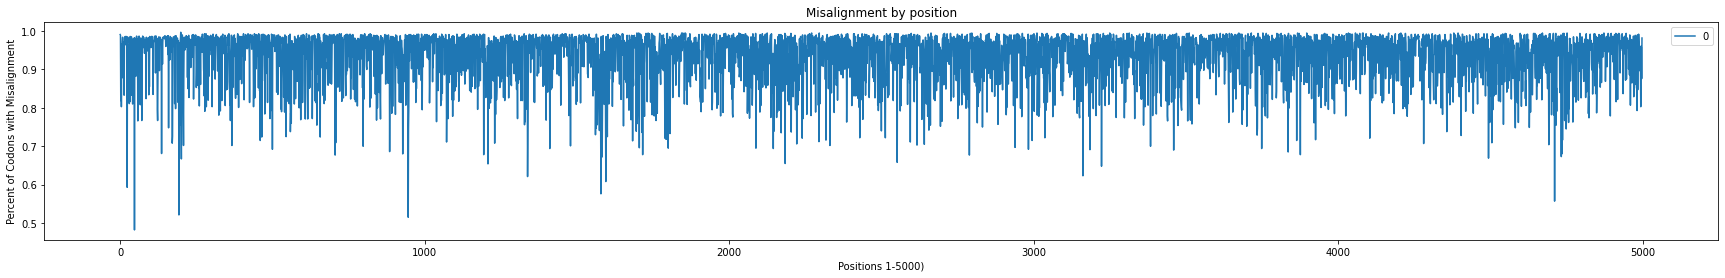

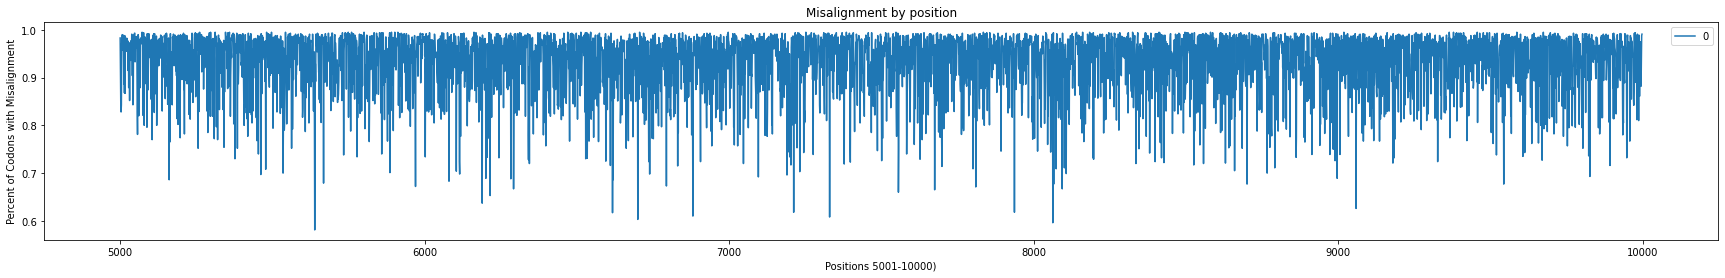

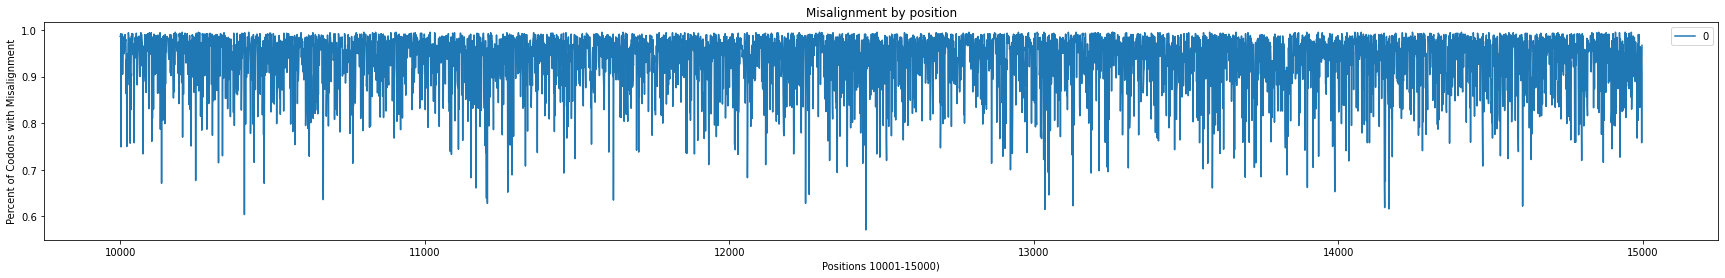

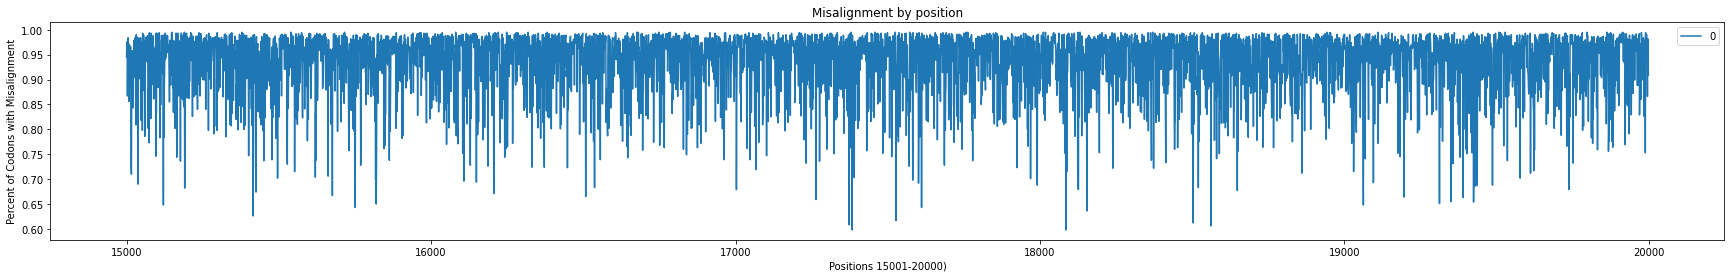

In [38]:
for i in range (0,20000,5000):
  printPlot(startLocation = i, endLocation = (i + 4999), \
            dataPoints = substitutionsLocalsCodonsUS2, \
            nucOrCodons = "Codons")

# Summary of 1,000 Genome Comparison

In [39]:
def printBoxPlotNucleotides(startLocation = 0, endLocation = 200):
  NucleotideComparisons = {"Original Reference (NC_063383)": \
                        substitutionsLocations[startLocation:endLocation],\
                         "First US Genome (ON_563414)": \
                        substitutionsLocationsUS[startLocation:endLocation],\
                         "First CA Genome (ON_676703)": \
                        substitutionsLocationsUS2[startLocation:endLocation]}
  NucComparisons = pd.DataFrame.from_dict(NucleotideComparisons)
  NComparisonsBoxPlot = NucComparisons.boxplot(column=\
                                          ['Original Reference (NC_063383)',\
                                           'First US Genome (ON_563414)',\
                                           'First CA Genome (ON_676703)'],\
                                            rot = 25)
  # plt.ylabel() = 

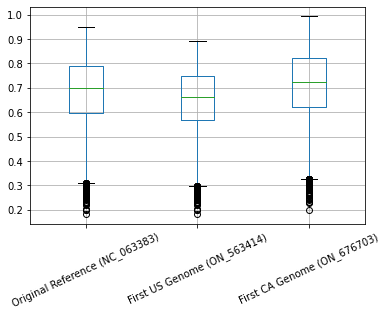

In [40]:
printBoxPlotNucleotides(0, 60000)

In [41]:
NucleotideComparisons = {"Original Reference (NC_063383)": \
                                                substitutionsLocations,\
                         "First US Genome (ON_563414)": \
                                                substitutionsLocationsUS,\
                         "First CA Genome (ON_676703)": \
                                                substitutionsLocationsUS2}

CodonComparisons = {"Original Reference (NC_063383)": \
                                              substitutionsLocationsCodons,\
                    "First US Genome (ON_563414)": \
                                              substitutionsLocationsCodonsUS,\
                    "First CA Genome (ON_676703)": \
                                              substitutionsLocationsCodonsUS2}

NucComparisons = pd.DataFrame.from_dict(NucleotideComparisons)
CodComparisons = pd.DataFrame.from_dict(CodonComparisons)

In [42]:
print(sum(substitutionsLocations)/len(substitutionsLocations))
print(sum(substitutionsLocationsUS)/len(substitutionsLocationsUS))
print(sum(substitutionsLocationsUS2)/len(substitutionsLocationsUS2))

0.6902045500000115
0.6542317333333316
0.7170451666666624


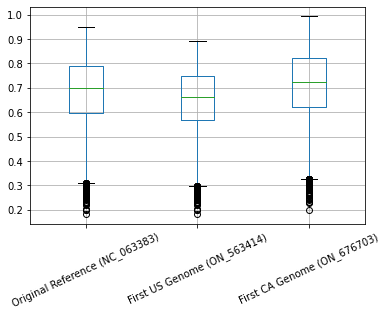

In [43]:
NComparisonsBoxPlot = NucComparisons.boxplot(column=\
                                          ['Original Reference (NC_063383)',\
                                           'First US Genome (ON_563414)',\
                                           'First CA Genome (ON_676703)'],\
                                            rot = 25)

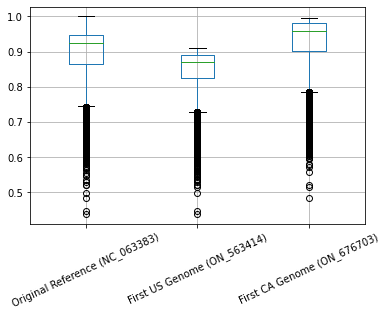

In [44]:
CComparisonsBoxPlot = CodComparisons.boxplot(column=\
                                        ['Original Reference (NC_063383)',\
                                         'First US Genome (ON_563414)',\
                                         'First CA Genome (ON_676703)'],\
                                          rot = 25)

In [45]:
NucleotideComparisons630 = {"Original Reference (NC_063383)": \
                                            substitutionsLocations[0:630],\
                         "First US Genome (ON_563414)": \
                                            substitutionsLocationsUS[0:630],\
                         "First CA Genome (ON_676703)": \
                                            substitutionsLocationsUS2[0:630]}

CodonComparisons210 = {"Original Reference (NC_063383)": \
                                        substitutionsLocationsCodons[0:210],\
                    "First US Genome (ON_563414)": \
                                        substitutionsLocationsCodonsUS[0:210],\
                    "First CA Genome (ON_676703)": \
                                        substitutionsLocationsCodonsUS2[0:210]}

NucComparisons630 = pd.DataFrame.from_dict(NucleotideComparisons630)
CodComparisons210 = pd.DataFrame.from_dict(CodonComparisons210)

In [46]:
print(sum(substitutionsLocations[0:630])/630)
print(sum(substitutionsLocationsUS[0:630])/630)
print(sum(substitutionsLocationsUS2[0:630])/630)

0.5721888888888887
0.6184444444444451
0.7222206349206355


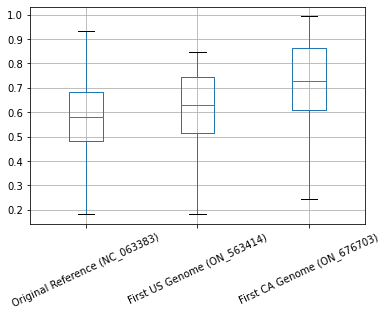

In [47]:
NComparisonsBoxPlot630 = NucComparisons630.boxplot(column=\
                                          ['Original Reference (NC_063383)',\
                                           'First US Genome (ON_563414)',\
                                           'First CA Genome (ON_676703)'],\
                                            rot = 25)

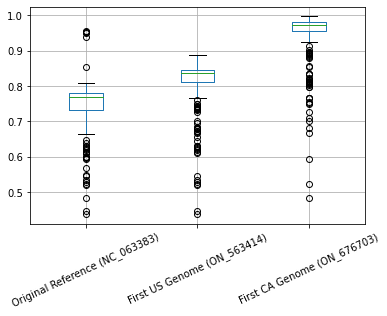

In [48]:
CComparisonsBoxPlot210 = CodComparisons210.boxplot(column=\
                                          ['Original Reference (NC_063383)',\
                                           'First US Genome (ON_563414)',\
                                           'First CA Genome (ON_676703)'],\
                                            rot = 25)

In [49]:
NucleotideComparisons90 = {"Original Reference (NC_063383)": \
                                            substitutionsLocations[0:90],\
                         "First US Genome (ON_563414)": \
                                            substitutionsLocationsUS[0:90],\
                         "First CA Genome (ON_676703)": \
                                            substitutionsLocationsUS2[0:90]}

CodonComparisons30 = {"Original Reference (NC_063383)": \
                                        substitutionsLocationsCodons[0:30],\
                    "First US Genome (ON_563414)": \
                                        substitutionsLocationsCodonsUS[0:30],\
                    "First CA Genome (ON_676703)": \
                                        substitutionsLocationsCodonsUS2[0:30]}
                                        
NucComparisons90 = pd.DataFrame.from_dict(NucleotideComparisons90)
CodComparisons30 = pd.DataFrame.from_dict(CodonComparisons30)

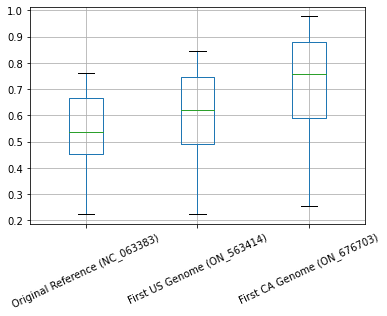

In [50]:
NComparisonsBoxPlot90 = NucComparisons90.boxplot(column=\
                                          ['Original Reference (NC_063383)',\
                                           'First US Genome (ON_563414)',\
                                           'First CA Genome (ON_676703)'],\
                                            rot = 25)

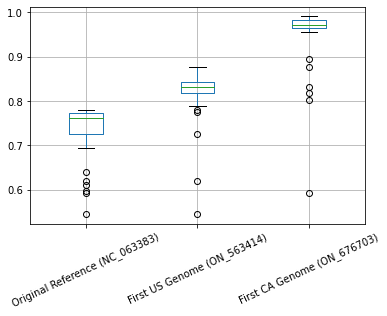

In [51]:
CComparisonsBoxPlot30 = CodComparisons30.boxplot(column=\
                                          ['Original Reference (NC_063383)',\
                                           'First US Genome (ON_563414)',\
                                           'First CA Genome (ON_676703)'],\
                                            rot = 25)

In [52]:
SequencesCSV.groupby(['USA']).agg({'Accession':'count'}).\
                              reset_index().\
                              sort_values('Accession',ascending=False).\
                              head(25)

USA  Accession
36  WA        241
11  IL        110
25  OH         31
18  MN         30
19  NC         25
24  NY         23
20  NE         21
26  OK         19
3   CA         18
8   FL         18
33  TX         15
9   GA         14
7   DE         10
35  VA          9
6   DC          7
21  NJ          7
28  PA          6
32  TN          6
2   AZ          5
5   CT          4
30  SC          4
16  MD          4
17  MI          3
23  NV          3
4   CO          3

In [53]:
SequencesCSV.groupby(['Organization']).agg({'Accession':'count'}).\
                              reset_index().\
                              sort_values('Accession',ascending=False).\
                              head(25)

Organization  Accession
5   Los Angeles County Public Health Laboratories,...        282
10                   UW Virology, Laboratory Medicine        268
0                                      CDC, DHCPP-PRB        185
8   Southern Illinois University, Molecular Biolog...         84
11  University of Nebraska Medical Center, Environ...         38
1                                          CDPH, VRDL         32
6                      Minnesota Department of Health         25
12  University of North Carolina at Chapel Hill, D...         19
3   Delaware Public Health Lab, Sequencing/Bioinfo...         16
2   Centers for Disease Control and Prevention, Di...         14
7   Rush University Meical Center, Regional Innova...         11
14                      Utah Public Health Laboratory         11
4   Idaho Bureau of Laboratories, Molecular Epidem...          9
9                               US Air Force, USAFSAM          3
13  University of Rochester Medical Center, Pathol...          2

## MSA Alignment Attempt

In [54]:
# !pip install bio

In [55]:
# # import biopython as Bio
# from Bio import AlignIO

# alignment = AlignIO.read(\
#        open("/content/drive/My Drive/QBIO_401_notes/sequences.fasta"), "fasta")
# print("Alignment length %i" % alignment.get_alignment_length())
# # counter = 0
# for record in alignment:
#   # counter += 1
#   print(record.seq + " " + record.id)
# # # attepmting to observe for a smaller amount of genomes
#   # if counter == 5:
#     # break

# Analysis of MSA (50 US Sequeces + NC_063383

##Nuclotide-Based Analysis

In [56]:
def readMSAalnFile():
  infile = open("/content/drive/My Drive/QBIO_401_notes/MSA_Aligned_File.aln")
  genome = []
  key = "null"
  dictionaryOfGenomes = {}
  for line in infile:
  # Capture name of the genome (Accesssion)
        if re.match(">", line):
          dictionaryOfGenomes[key] = genome.copy()
          genome.clear()
          # Isolate Accession from excess information
          linelistforkey = line.split(" ")
          # print(linelistforkey)
          # break
          linelistforkey2 = linelistforkey[0].split("|")[1]
          if linelistforkey2 != "consensus":
            linelistforkey2 = linelistforkey2.split(".")[0]
          key = linelistforkey2.strip()
          # print(key)
          # Skip this line so it is not read into the dataframe
          continue
        # Read in all of the nucleotides
        linelist = list(line)
        for i in range(0,len(linelist) - 1,1):
          genome.append(linelist[i])
  # Close file
  infile.close()
  # Convert dictionary to dataframe
  # print(len(dictionaryOfGenomes['consensus']))
  # print(len(dictionaryOfGenomes['NC_063383']))
  del dictionaryOfGenomes["null"]
  dataFrame50MPoc = pd.DataFrame.from_dict(dictionaryOfGenomes)
  return dataFrame50MPoc

dataFrame50MPoc = readMSAalnFile()
dataFrame50MPoc

consensus OP526855 OP650029 OP484341 OP526859 OP820455 OP603002  \
0              -        -        -        -        -        -        -   
1              -        -        -        -        -        -        -   
2              -        -        -        -        -        -        -   
3              -        -        -        -        -        -        -   
4              -        -        -        -        -        -        -   
...          ...      ...      ...      ...      ...      ...      ...   
197906         -        -        -        -        -        -        -   
197907         -        -        -        -        -        -        -   
197908         -        -        -        -        -        -        -   
197909         -        -        -        -        -        -        -   
197910         -        -        -        -        -        -        -   

       NC_063383 OP681772 OP392536  ... OP328307 OP747057 OP257256 OP743979  \
0              -        T        T  ...        T        T        -        -   
1              -        T        T  ...        T        T        -        -   
2              -        T        T  ...        T        T        -        -   
3              -        T        T  ...        T        T        -        -   
4              -        A        A  ...        A        A        -        -   
...          ...      ...      ...  ...      ...      ...      ...      ...   
197906         -        T        T  ...        -        T        -        T   
197907         -        A        A  ...        -        A        -        A   
197908         -        A        A  ...        -        A        -        A   
197909         -        A        A  ...        -        A        -        A   
197910         -        A        A  ...        -        A        -        A   

       OP328312 OP752103 OP604565 ON563414 ON959131 OP743954  
0             T        -        -        T        -        T  
1             T        -        -        T        -        T  
2             T        -        -        T        -        T  
3             T        -        -        T        -        T  
4             A        -        -        A        -        A  
...         ...      ...      ...      ...      ...      ...  
197906        -        -        -        T        -        T  
197907        -        -        -        A        -        A  
197908        -        -        -        A        -        A  
197909        -        -        -        A        -        A  
197910        -        -        -        A        -        A  

[197911 rows x 51 columns]

In [57]:
totalA_MSA = (dataFrame50MPoc == "A").astype(int).sum(axis=1)
totalC_MSA = (dataFrame50MPoc == "C").astype(int).sum(axis=1)
totalG_MSA = (dataFrame50MPoc == "G").astype(int).sum(axis=1)
totalT_MSA = (dataFrame50MPoc == "T").astype(int).sum(axis=1)
totalN_MSA = (dataFrame50MPoc == "N").astype(int).sum(axis=1)
totalD_MSA = (dataFrame50MPoc == "-").astype(int).sum(axis=1)

withoutA_MSA = (dataFrame50MPoc != "A").astype(int).sum(axis=1)
withoutC_MSA = (dataFrame50MPoc != "C").astype(int).sum(axis=1)
withoutG_MSA = (dataFrame50MPoc != "G").astype(int).sum(axis=1)
withoutT_MSA = (dataFrame50MPoc != "T").astype(int).sum(axis=1)
withoutN_MSA = (dataFrame50MPoc != "N").astype(int).sum(axis=1)
withoutD_MSA = (dataFrame50MPoc != "-").astype(int).sum(axis=1)

In [58]:
def findTotalSubstitutions50MSA(RefGenome = dataFrame50MPoc["NC_063383"]):
  totalSubstitutions = 0
  counter = 0
  for i in RefGenome:
    # print(i)
    if i == "A":
      totalSubstitutions += withoutA_MSA[counter]
    if i == "C":
      totalSubstitutions += withoutC_MSA[counter]
    if i == "G":
      totalSubstitutions += withoutG_MSA[counter]
    if i == "T":
      totalSubstitutions += withoutT_MSA[counter]
    if i == "N":
      totalSubstitutions += withoutN_MSA[counter]
    if i == "-":
      totalSubstitutions += withoutN_MSA[counter]
    counter += 1
    # if counter%1000 == 0:
      # print(counter)
  return totalSubstitutions

def breakdownOfSubstitutions50MSA(RefGenome = dataFrame50MPoc["NC_063383"]):
  totalSubstitutions = 0
  counter = 0
  SubLocals = []
  for i in RefGenome:
    # print(i)
    if i == "A":
      SubLocals.append(withoutA_MSA[counter])
    if i == "C":
      SubLocals.append(withoutC_MSA[counter])
    if i == "G":
      SubLocals.append(withoutG_MSA[counter])
    if i == "T":
      SubLocals.append(withoutT_MSA[counter])
    if i == "N":
      SubLocals.append(withoutN_MSA[counter])
    if i == "-":
      SubLocals.append(withoutD_MSA[counter])
    counter += 1
    # if counter%1000 == 0:
      # print(counter)
  return SubLocals

def findCertainSubstitution50MSA(RefNuc, ReplacementNuc):
  totalSubstitutions = 0
  counter = 0
  isReplacementNucNow = \
                (dataFrame50MPoc == ReplacementNuc).astype(int).sum(axis=1)
  for i in dataFrame50MPoc["NC_063383"]:
    if i == RefNuc:
      totalSubstitutions += isReplacementNucNow[counter]
    counter += 1
  return totalSubstitutions

In [59]:
print(findTotalSubstitutions50MSA())
print(findCertainSubstitution50MSA("A", "A"))
substitutionsLocations50MSA = []
substitutionsLocations50MSA = breakdownOfSubstitutions50MSA()
substitutionsLocations50MSA = [x / 51 for x in substitutionsLocations50MSA]
substitutionsLocals50MSA = pd.DataFrame(substitutionsLocations50MSA)

51693
3371060


In [60]:
substitutionsCounts = [0,0,0,0,0,0,\
                       0,0,0,0,0,0,\
                       0,0,0,0,0,0,\
                       0,0,0,0,0,0,\
                       0,0,0,0,0,0]

NucleotidesRef = ["A", "C", "G", "T", '-']
Nucleotides = ["A", "C", "G", "T", "N", '-']
counter = 0
for i in NucleotidesRef:
  for j in Nucleotides:
    substitutionsCounts[counter] = findCertainSubstitution50MSA(i, j)
    counter += 1

print("----------------------------------------------------------")
for i in range(0,5,1):
  for j in range(0,6,1):
    print(" ", NucleotidesRef[i], "->", Nucleotides[j], "  ", end="")
    if j != 5:
      print("|", end="")
    else:
      print("")
  for j in range(0,6,1):
    print(" ", substitutionsCounts[6*i+ j], " ", end="")
    if j != 5:
      print("|", end="")
    else:
      print("")
  print("----------------------------------------------------------")

verifytotal = 0
for i in range (0,30,1):
  verifytotal += substitutionsCounts[i]
print("")
print(verifytotal) 

----------------------------------------------------------
  A -> A   |  A -> C   |  A -> G   |  A -> T   |  A -> N   |  A -> -   
  3371060  |  57  |  162  |  22  |  552  |  3989  
----------------------------------------------------------
  C -> A   |  C -> C   |  C -> G   |  C -> T   |  C -> N   |  C -> -   
  0  |  1659578  |  3  |  1287  |  222  |  1609  
----------------------------------------------------------
  G -> A   |  G -> C   |  G -> G   |  G -> T   |  G -> N   |  G -> -   
  1911  |  0  |  1655485  |  63  |  205  |  1666  
----------------------------------------------------------
  T -> A   |  T -> C   |  T -> G   |  T -> T   |  T -> N   |  T -> -   
  7  |  115  |  5  |  3355087  |  646  |  3916  
----------------------------------------------------------
  - -> A   |  - -> C   |  - -> G   |  - -> T   |  - -> N   |  - -> -   
  747  |  134  |  94  |  839  |  558  |  33409  
----------------------------------------------------------

10093428


In [61]:
### THIS FUNCTION IS DEFINED ABOVE, THIS IS A REPEAT ###

def printPlot(startLocation = 0, endLocation = 5, \
              figureSizeWidth = 30, figureSizeHeight = 4,\
              dataPoints = substitutionsLocals50MSA,
              nucOrCodons = "Nucleotides"):
  SubLocalPlot = dataPoints[startLocation:endLocation]\
                  .plot(figsize=(figureSizeWidth, figureSizeHeight))
  # xlabel = str
  plt.xlabel(f"Positions {startLocation + 1}-{endLocation + 1}")
  plt.ylabel(f"Percent of {nucOrCodons} with Substitution")
  plt.title("Substituions by position")

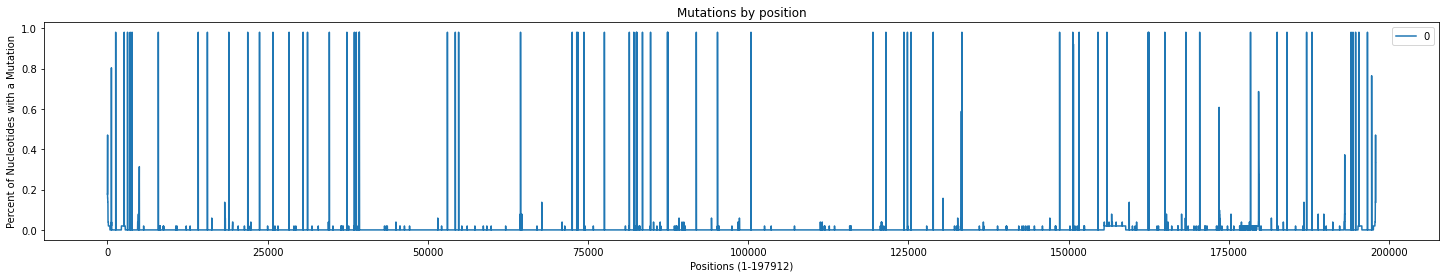

In [104]:
printPlot(startLocation = 0, endLocation = 197911, \
            figureSizeWidth = 25, figureSizeHeight = 4,\
            dataPoints = substitutionsLocals50MSA, \
            nucOrCodons = "Nucleotides")
# printPlot(startLocation = 98956, endLocation = (197911), \
#             figureSizeWidth = 40, figureSizeHeight = 4,\
#             dataPoints = substitutionsLocals50MSA, \
#             nucOrCodons = "Nucleotides")

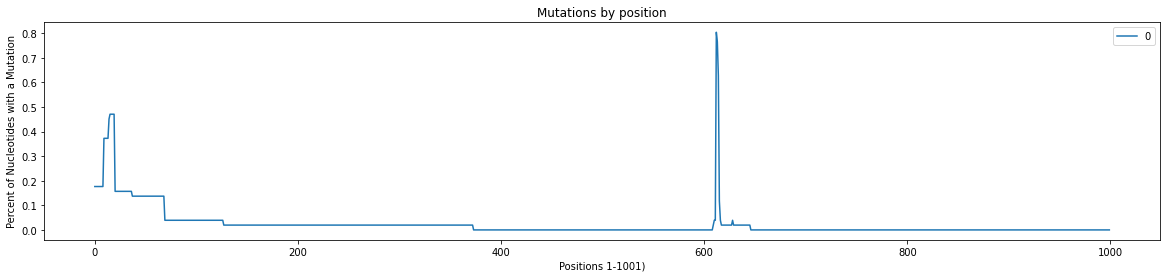

In [101]:
printPlot(startLocation = 0, endLocation = 1000, \
            figureSizeWidth = 20, figureSizeHeight = 4,\
            dataPoints = substitutionsLocals50MSA, \
            nucOrCodons = "Nucleotides")

In [64]:
counter = 0
holder = 0
location = 0
for i in range(0,197911,1):
  if substitutionsLocations50MSA[i] == 0:
    counter += 1
  if counter > holder:
    holder = counter
    location = i
  if substitutionsLocations50MSA[i] != 0:
    counter = 0
print(f"the longest string without mutations is {holder},", \
           f"from positions {location - holder + 1} to {location + 1}")

the longest string without mutations is 4401, from positions 47140 to 51541


In [65]:
counter = 0
for i in substitutionsLocations50MSA:
  if i != 0:
    counter += 1
print(f"total number of mutations from the NC_063383 Genome: {counter}")

total number of mutations from the NC_063383 Genome: 9564


In [66]:
counter = 0
holder = 0
location = 0
for i in range(0,197911,1):
  if substitutionsLocations50MSA[i] != 0:
    counter += 1
  if counter > holder:
    holder = counter
    location = i
  if substitutionsLocations50MSA[i] == 0:
    counter = 0
print(f"the longest string of mutations is {holder},", \
           f"from positions {location - holder + 1} to {location + 1}")

the longest string of mutations is 3370, from positions 155521 to 158891


##Codon-Based Analysis

In [67]:
# counter = 0
# # indicator = 1
# position = 0
# noSpace = ""
# dictionary_codons = {}
# build_codon = ["z","z","z"]
# dataFrame50MPocColumns = list(dataFrame50MPoc)
# for column in dataFrame50MPocColumns:
#   dictionary_codons[column] = []
#   for row in range(0,197911,1):
#     if dataFrame50MPoc[column][row] != "-":
#       build_codon[position] = dataFrame50MPoc[column][row]
#       position += 1
#       if position == 3:
#         position = 0
#         dictionary_codons[column].append(noSpace.join(build_codon))
  

# keysList = list(dictionary_codons.keys())
# holder = 0
# longestKey = 0
# for key in keysList:
#   if len(dictionary_codons[key]) > holder:
#     holder = len(dictionary_codons[key])
#     longestKey = key

# for key in keysList:
#   numOfDashs = holder - len(dictionary_codons[key])
#   for i in range(0,numOfDashs,1):
#     dictionary_codons[key].append("---")


# print(longestKey, holder)
# print(dictionary_codons["ON959131"][1:5])
# dataFrame50MPocCodons = pd.DataFrame.from_dict(dictionary_codons)     
# dataFrame50MPocCodons

In [68]:
# the following functions were taken from course material regarding this topic
# and adapted to the current material. I did include the N's into the codons
# when the nucleotide makes no difference.

aminoAcids = ['Phe','Leu','Ile','Met (Start)','Val','Ser','Pro','Thr','Ala',\
              'Tyr','Cys','Stop','His','Gln','Arg','Asn','Lys','Asp','Gly','Trp'] 
    # aa is list of amino acids

HumanCodons = [['TTT','TTC'], #Phe
               ['TTA','TTG', 'CTT', 'CTC','CTA','CTG','CTN'], #Leu
               ['ATT','ATC','ATA'], #Ile
               ['ATG'], #Met (START)
               ['GTT','GTC','GTA','GTG','GTN'], #Val
               ['UCT','TCC','TCA','TCG','AGT','AGC','TCN'], #Ser
               ['CCT','CCC','CCA','CCG','CCN'], #Pro
               ['ACT','ACC','ACA','ACG','ACN'], #Thr
               ['GCT','GCC','GCA','GCG','GCN'], #Ala
               ['TAT','TAC'], #Tyr
               ['TGT','TGC'], #Cys
               ['TAA','TAG','TGA'], #STOP
               ['CAU','CAC'], #His
               ['CAA','CAG'], #Gln
               ['CGU','CGC','CGA','CGG','AGA','AGG','CGN'], #Arg
               ['AAU','AAC'], #Asn
               ['AAA','AAG'], #Lys
               ['GAT','GAC'], #Asp
               ['GAA','GAG','GGU','GGC','GGG','GGA','GGN'], #Gly
               ['TGG']] #Trp

def dicDNA2aa(codons = codons, aminoAcids = aminoAcids):
    aaDIC = {} # empty dictionary
    for i in range(len(codons)):
        for j in range(len(codons[i])):
            aaDIC[codons[i][j]] = aminoAcids[i]
    return aaDIC

In [69]:
counter = 0
# indicator = 1
position = 0
noSpace = ""
dictionary_codons = {}
build_codon = ["z","z","z"]
dataFrame50MPocColumns = list(dataFrame50MPoc)
row = 0
increase = 0
for column in dataFrame50MPocColumns:
  dictionary_codons[column] = []
  while row <= 197910:
    currentPosition = 0
    # print(noSpace.join(list(dataFrame50MPoc[column][row:row + 3])), codons[5])
    if (noSpace.join(list(dataFrame50MPoc[column][row:row + 3])) in HumanCodons[3]):
      # print(noSpace.join(list(dataFrame50MPoc[column][row:row + 3])))
      # break
      currentPosition = row
      while (noSpace.join(list(dataFrame50MPoc[column]\
                               [currentPosition:currentPosition + 3])) \
                                in HumanCodons[11]) == False:
        # print(noSpace.join(list(dataFrame50MPoc[column]\
                              #  [currentPosition:currentPosition + 3])))
        # break
        dictionary_codons[column].append(\
                  noSpace.join(list(dataFrame50MPoc[column]\
                               [currentPosition:currentPosition + 3])))
        currentPosition += 3
        increase += 3
        if currentPosition + 3 >= 197910:
          break
    if increase != 0:
      row += increase
      increase = 0
    else:
      row += 1
  print(column)
  row = 0

      # build_codon[position] = dataFrame50MPoc[column][row]
      # position += 1
      # if position == 3:
      #   position = 0
      #   dictionary_codons[column].append(noSpace.join(build_codon))

# Look for start codon
# inc by 3's till end
# inc by 1's until start


keysList = list(dictionary_codons.keys())
holder = 0
longestKey = 0
for key in keysList:
  if len(dictionary_codons[key]) > holder:
    holder = len(dictionary_codons[key])
    longestKey = key

for key in keysList:
  numOfDashs = holder - len(dictionary_codons[key])
  for i in range(0,numOfDashs,1):
    dictionary_codons[key].append("---")

print(longestKey, holder)
print(dictionary_codons["ON959131"][1:5])
dataFrame50MPocCodons = pd.DataFrame.from_dict(dictionary_codons)     
dataFrame50MPocCodons

consensus
OP526855
OP650029
OP484341
OP526859
OP820455
OP603002
NC_063383
OP681772
OP392536
OP536697
OP378696
OP603003
OP536704
OP687934
OP536742
OP536686
OP055809
OP752111
OP604525
OP881947
OP378704
OP314957
OP687942
OP225964
OP604526
OP687944
OP603010
OP604520
OP752124
OP303780
OP185716
OP881945
OP536738
OP604522
OP185710
ON676703
OP171925
OP351284
OP743972
OP743986
OP328307
OP747057
OP257256
OP743979
OP328312
OP752103
OP604565
ON563414
ON959131
OP743954
OP604520 45893
['TGT', 'GAC', 'CCA', 'CGA']


consensus OP526855 OP650029 OP484341 OP526859 OP820455 OP603002  \
0           ATG      ATG      ATG      ATG      ATG      ATG      ATG   
1           TGT      TGT      TGT      TGT      TGT      ATG      TGT   
2           GAC      GAC      GAC      GAC      GAC      TTA      GAC   
3           CCA      CCA      CCA      CCA      CCA      ACG      CCA   
4           CGA      CGA      CGA      CGA      CGA      TGT      CGA   
...         ...      ...      ...      ...      ...      ...      ...   
45888       ---      ---      ---      ---      ---      ---      ---   
45889       ---      ---      ---      ---      ---      ---      ---   
45890       ---      ---      ---      ---      ---      ---      ---   
45891       ---      ---      ---      ---      ---      ---      ---   
45892       ---      ---      ---      ---      ---      ---      ---   

      NC_063383 OP681772 OP392536  ... OP328307 OP747057 OP257256 OP743979  \
0           ATG      ATG      ATG  ...      ATG      ATG      ATG      ATG   
1           TGT      TGT      TGT  ...      TGT      TGT      TGT      TGT   
2           GAC      GAC      GAC  ...      GAC      GAC      GAC      GAC   
3           CCA      CCA      CCA  ...      CCA      CCA      CCA      CCA   
4           CGA      CGA      CGA  ...      CGA      CGA      CGA      CGA   
...         ...      ...      ...  ...      ...      ...      ...      ...   
45888       ---      ---      ---  ...      ---      ---      ---      ---   
45889       ---      ---      ---  ...      ---      ---      ---      ---   
45890       ---      ---      ---  ...      ---      ---      ---      ---   
45891       ---      ---      ---  ...      ---      ---      ---      ---   
45892       ---      ---      ---  ...      ---      ---      ---      ---   

      OP328312 OP752103 OP604565 ON563414 ON959131 OP743954  
0          ATG      ATG      ATG      ATG      ATG      ATG  
1          TGT      TGT      TGT      TGT      TGT      TGT  
2          GAC      GAC      GAC      GAC      GAC      GAC  
3          CCA      CCA      CCA      CCA      CCA      CCA  
4          CGA      CGA      CGA      CGA      CGA      CGA  
...        ...      ...      ...      ...      ...      ...  
45888      ---      ---      ---      ---      ---      ---  
45889      ---      ---      ---      ---      ---      ---  
45890      ---      ---      ---      ---      ---      ---  
45891      ---      ---      ---      ---      ---      ---  
45892      ---      ---      ---      ---      ---      ---  

[45893 rows x 51 columns]

In [70]:
# path = "/content/drive/My Drive/QBIO_401_notes/Codons_Excel_Version.xlsx"
# with pd.ExcelWriter(path) as writer:
#     dataFrame50MPocCodons.to_excel\
#                           (writer, index = False, sheet_name = "Codons")

In [71]:
def findCodonFrequencies(dataSet = dataFrame50MPocCodons):
  CodonFrequencies = []
  counter = 0
  for i in HumanCodons:
    listOfCodonsWithFiller = ["These", "Entries", "Should",\
                            "Not Trigger", "The Sequence", "Of Or","Sequences"]
    counter2 = 0
    for j in i:
      listOfCodonsWithFiller[counter2] = j
      counter2 += 1
    withCodon = ((dataSet == listOfCodonsWithFiller[0]) |\
                (dataSet == listOfCodonsWithFiller[1]) |\
                (dataSet == listOfCodonsWithFiller[2]) |\
                (dataSet == listOfCodonsWithFiller[3]) |\
                (dataSet == listOfCodonsWithFiller[4]) |\
                (dataSet == listOfCodonsWithFiller[5]) |\
                (dataSet == listOfCodonsWithFiller[6])).astype(int).sum(axis=1)    
    CodonFrequencies.append(sum(withCodon))
  print(CodonFrequencies)
  return CodonFrequencies

In [72]:
# codons = [['TTT', 'TTC'], #Phe
withoutCodonPhe_MSA = ((dataFrame50MPocCodons != HumanCodons[0][0]) &\
              (dataFrame50MPocCodons != HumanCodons[0][1])).astype(int).sum(axis=1)   
#       ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG', 'CTN'], #Leu
withoutCodonLeu_MSA = ((dataFrame50MPocCodons != HumanCodons[1][0]) &\
              (dataFrame50MPocCodons != HumanCodons[1][1]) &\
              (dataFrame50MPocCodons != HumanCodons[1][2]) &\
              (dataFrame50MPocCodons != HumanCodons[1][3]) &\
              (dataFrame50MPocCodons != HumanCodons[1][4]) &\
              (dataFrame50MPocCodons != HumanCodons[1][5]) &\
              (dataFrame50MPocCodons != HumanCodons[1][6])).astype(int).sum(axis=1)  
#       ['ATT', 'ATC', 'ATA'], #Ile
withoutCodonIle_MSA = ((dataFrame50MPocCodons != HumanCodons[2][0]) &\
              (dataFrame50MPocCodons != HumanCodons[2][1]) &\
              (dataFrame50MPocCodons != HumanCodons[2][2])).astype(int).sum(axis=1)   
#       ['ATG'], #Met Start
withoutCodonMet_MSA = ((dataFrame50MPocCodons != HumanCodons[3][0])).astype(int).sum(axis=1)   
#       ['GTT', 'GTC', 'GTA', 'GTG', 'GTN], #Val
withoutCodonVal_MSA = ((dataFrame50MPocCodons != HumanCodons[4][0]) &\
              (dataFrame50MPocCodons != HumanCodons[4][1]) &\
              (dataFrame50MPocCodons != HumanCodons[4][2]) &\
              (dataFrame50MPocCodons != HumanCodons[4][3]) &\
              (dataFrame50MPocCodons != HumanCodons[4][4])).astype(int).sum(axis=1)   
#       ['TCT', 'TCC', 'TCA', 'TCG', 'TCN', 'AGT', 'AGC'], #Ser
withoutCodonSer_MSA = ((dataFrame50MPocCodons != HumanCodons[5][0]) &\
              (dataFrame50MPocCodons != HumanCodons[5][1]) &\
              (dataFrame50MPocCodons != HumanCodons[5][2]) &\
              (dataFrame50MPocCodons != HumanCodons[5][3]) &\
              (dataFrame50MPocCodons != HumanCodons[5][4]) &\
              (dataFrame50MPocCodons != HumanCodons[5][5]) &\
              (dataFrame50MPocCodons != HumanCodons[5][6])).astype(int).sum(axis=1)   
#       ['CCT', 'CCC', 'CCA', 'CCG', 'CCN'], #Pro
withoutCodonPro_MSA = ((dataFrame50MPocCodons != HumanCodons[6][0]) &\
              (dataFrame50MPocCodons != HumanCodons[6][1]) &\
              (dataFrame50MPocCodons != HumanCodons[6][2]) &\
              (dataFrame50MPocCodons != HumanCodons[6][3]) &\
              (dataFrame50MPocCodons != HumanCodons[6][4])).astype(int).sum(axis=1)   
#       ['ACT', 'ACC', 'ACA', 'ACG', 'ACN'], #Thr
withoutCodonThr_MSA = ((dataFrame50MPocCodons != HumanCodons[7][0]) &\
              (dataFrame50MPocCodons != HumanCodons[7][1]) &\
              (dataFrame50MPocCodons != HumanCodons[7][2]) &\
              (dataFrame50MPocCodons != HumanCodons[7][3]) &\
              (dataFrame50MPocCodons != HumanCodons[7][4])).astype(int).sum(axis=1)   
#       ['GCT', 'GCC', 'GCA', 'GCG', 'GCN'], #Ala
withoutCodonAla_MSA = ((dataFrame50MPocCodons != HumanCodons[8][0]) &\
              (dataFrame50MPocCodons != HumanCodons[8][1]) &\
              (dataFrame50MPocCodons != HumanCodons[8][2]) &\
              (dataFrame50MPocCodons != HumanCodons[8][3]) &\
              (dataFrame50MPocCodons != HumanCodons[8][4])).astype(int).sum(axis=1)   
#       ['TAT', 'TAC'], #Tyr
withoutCodonTyr_MSA = ((dataFrame50MPocCodons != HumanCodons[9][0]) &\
              (dataFrame50MPocCodons != HumanCodons[9][1])).astype(int).sum(axis=1) 
#       ['TGT', 'TGC'], #Cys
withoutCodonCys_MSA = ((dataFrame50MPocCodons != HumanCodons[10][0]) &\
              (dataFrame50MPocCodons != HumanCodons[10][1])).astype(int).sum(axis=1)    
#       ['TAA', 'TAG', 'TGA'], #Stop
withoutCodonStop_MSA = ((dataFrame50MPocCodons != HumanCodons[11][0]) &\
              (dataFrame50MPocCodons != HumanCodons[11][1]) &\
              (dataFrame50MPocCodons != HumanCodons[11][2])).astype(int).sum(axis=1)   
#       ['CAT', 'CAC'], #His
withoutCodonHis_MSA = ((dataFrame50MPocCodons != HumanCodons[12][0]) &\
              (dataFrame50MPocCodons != HumanCodons[12][1])).astype(int).sum(axis=1)   
#       ['CAA', 'CAG'], #Gln
withoutCodonGln_MSA = ((dataFrame50MPocCodons != HumanCodons[13][0]) &\
              (dataFrame50MPocCodons != HumanCodons[13][1])).astype(int).sum(axis=1)  
#       ['CGT', 'CGC', 'CGA', 'CGG', 'CGN', 'AGA', 'AGG'], #Arg
withoutCodonArg_MSA = ((dataFrame50MPocCodons != HumanCodons[14][0]) &\
              (dataFrame50MPocCodons != HumanCodons[14][1]) &\
              (dataFrame50MPocCodons != HumanCodons[14][2]) &\
              (dataFrame50MPocCodons != HumanCodons[14][3]) &\
              (dataFrame50MPocCodons != HumanCodons[14][4]) &\
              (dataFrame50MPocCodons != HumanCodons[14][5]) &\
              (dataFrame50MPocCodons != HumanCodons[14][6])).astype(int).sum(axis=1)   
#       ['AAT', 'AAC'], #Asn
withoutCodonAsn_MSA = ((dataFrame50MPocCodons != HumanCodons[15][0]) &\
              (dataFrame50MPocCodons != HumanCodons[15][1])).astype(int).sum(axis=1)  
#       ['AAA', 'AAG'], #Lys
withoutCodonLys_MSA = ((dataFrame50MPocCodons != HumanCodons[16][0]) &\
              (dataFrame50MPocCodons != HumanCodons[16][1])).astype(int).sum(axis=1)  
#       ['GAT', 'GAC'], #Asp
withoutCodonAsp_MSA = ((dataFrame50MPocCodons != HumanCodons[17][0]) &\
              (dataFrame50MPocCodons != HumanCodons[17][1])).astype(int).sum(axis=1)      
#       ['GAA', 'GAG', 'GGT', 'GGC', 'GGA', 'GGG', 'GGN']] #Gly
withoutCodonGly_MSA = ((dataFrame50MPocCodons != HumanCodons[18][0]) &\
              (dataFrame50MPocCodons != HumanCodons[18][1]) &\
              (dataFrame50MPocCodons != HumanCodons[18][2]) &\
              (dataFrame50MPocCodons != HumanCodons[18][3]) &\
              (dataFrame50MPocCodons != HumanCodons[18][4]) &\
              (dataFrame50MPocCodons != HumanCodons[18][5]) &\
              (dataFrame50MPocCodons != HumanCodons[18][6])).astype(int).sum(axis=1)  
#       ['TGG'], #Trp
withoutCodonTrp_MSA = ((dataFrame50MPocCodons != HumanCodons[19][0])).astype(int).sum(axis=1)  

WithoutCodonsList_MSA = [withoutCodonPhe_MSA,withoutCodonLeu_MSA,withoutCodonIle_MSA,\
                         withoutCodonMet_MSA,withoutCodonVal_MSA,withoutCodonSer_MSA,\
                         withoutCodonPro_MSA,withoutCodonThr_MSA,withoutCodonAla_MSA,\
                         withoutCodonTyr_MSA,withoutCodonCys_MSA,withoutCodonStop_MSA,\
                         withoutCodonHis_MSA,withoutCodonGln_MSA,withoutCodonArg_MSA,\
                         withoutCodonAsn_MSA,withoutCodonLys_MSA,withoutCodonAsp_MSA,\
                         withoutCodonGly_MSA,withoutCodonTrp_MSA]

# aminoAcids = ['Phe','Leu','Ile','Met (Start)','Val','Ser','Pro','Thr','Ala',\
#               'Tyr','Cys','Stop','His','Gln','Arg','Asn','Lys','Asp','Gly','Trp'] 

In [73]:
withoutCodonTAN_MSA = ((dataFrame50MPocCodons != "TAN")).astype(int).sum(axis=1) 
withoutCodonANT_MSA = ((dataFrame50MPocCodons != "ANT")).astype(int).sum(axis=1)  
withoutCodonNTT_MSA = ((dataFrame50MPocCodons != "NTT")).astype(int).sum(axis=1)   

In [74]:
def findTotalSubstitutionsCodons_MSA(WithoutCodonsList = WithoutCodonsList_MSA,\
                             RefGenome = dataFrame50MPocCodons["NC_063383"]):
  totalSubstitutions = 0
  # counter = 0
  for i in RefGenome:
    for j in range(0,20,1):
      if i in HumanCodons[j]:
        totalSubstitutions += WithoutCodonsList_MSA[j][counter]
    # counter += 1  
    # if counter%1000 == 0:
    #   print(counter)
  return totalSubstitutions

def breakdownOfSubstitutionsCodons_MSA(WithoutCodonsList = WithoutCodonsList_MSA,\
                             RefGenome = dataFrame50MPocCodons["NC_063383"]):
  totalSubstitutions = 0
  counter = 0
  SubLocals = []
  for i in RefGenome:
    for j in range(0,20,1):
      if i in HumanCodons[j]:
        SubLocals.append(WithoutCodonsList_MSA[j][counter])
    if i in ['ANT']:
      SubLocals.append(withoutCodonANT_MSA[counter])
    if i in ['TAN']:
      SubLocals.append(withoutCodonTAN_MSA[counter])
    if i in ['NTT']:
      SubLocals.append(withoutCodonNTT_MSA[counter])
    counter += 1  
    # if counter%1000 == 0:
    #   print(counter)
  return SubLocals

print(findTotalSubstitutionsCodons_MSA(RefGenome = dataFrame50MPocCodons["consensus"]))
substitutionsLocationsCodons_MSA_C = []
substitutionsLocationsCodons_MSA_C = breakdownOfSubstitutionsCodons_MSA(\
                                    RefGenome = dataFrame50MPocCodons["consensus"])
substitutionsLocationsCodons_MSA_C = \
                          [x / 51 for x in substitutionsLocationsCodons_MSA_C]
substitutionsLocalsCodons_MSA_C = pd.DataFrame(substitutionsLocationsCodons_MSA_C)

print(findTotalSubstitutionsCodons_MSA())
substitutionsLocationsCodons_MSA = []
substitutionsLocationsCodons_MSA = breakdownOfSubstitutionsCodons_MSA()
substitutionsLocationsCodons_MSA = \
                          [x / 51 for x in substitutionsLocationsCodons_MSA]
substitutionsLocalsCodons_MSA = pd.DataFrame(substitutionsLocationsCodons_MSA)

1944375
1945140


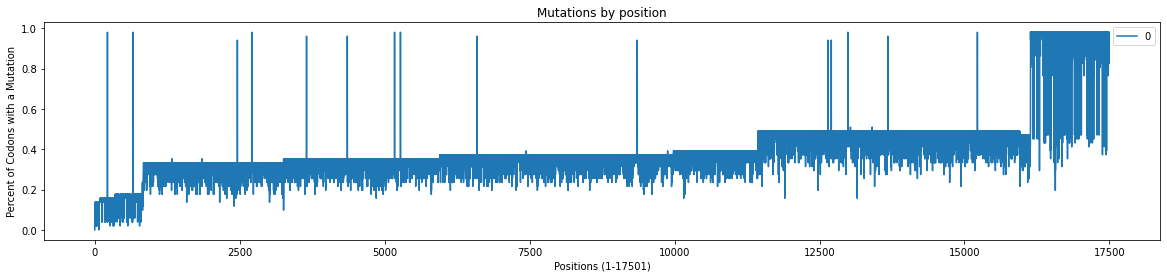

In [107]:
printPlot(startLocation = 0, endLocation = 17500, \
            figureSizeWidth = 20, figureSizeHeight = 4,\
            dataPoints = substitutionsLocalsCodons_MSA, \
            nucOrCodons = "Codons")

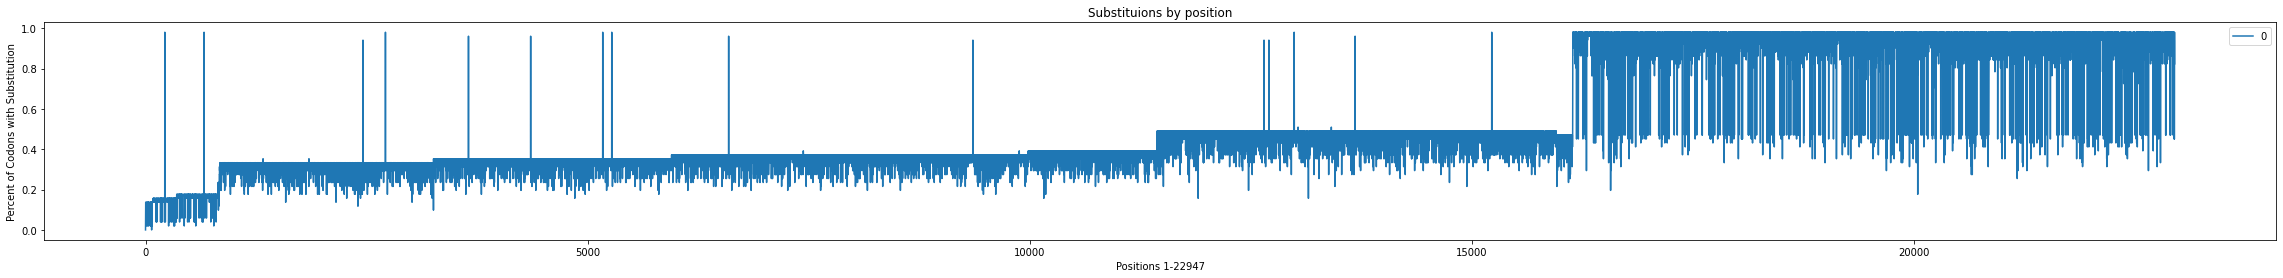

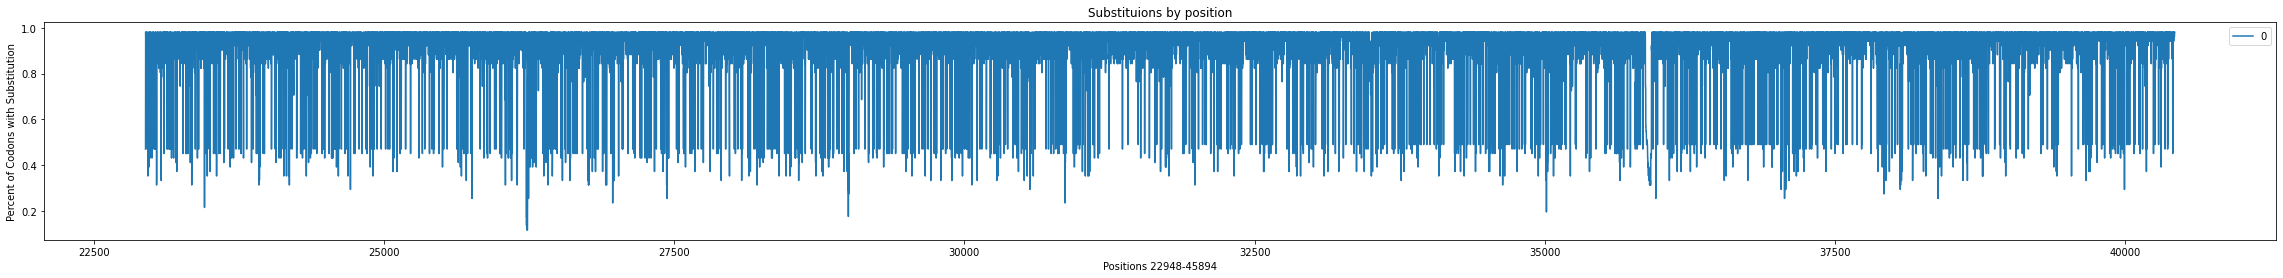

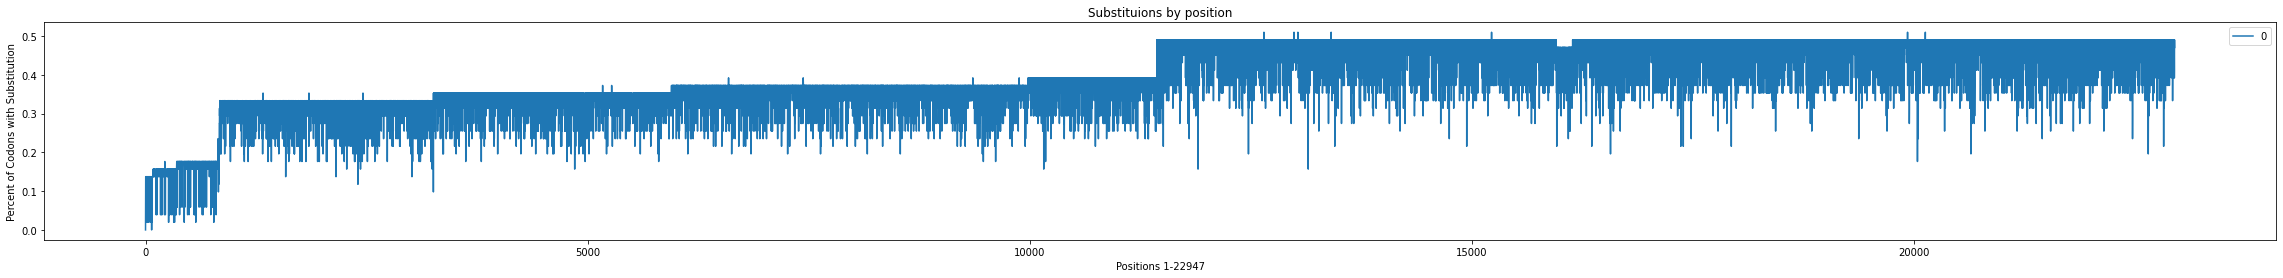

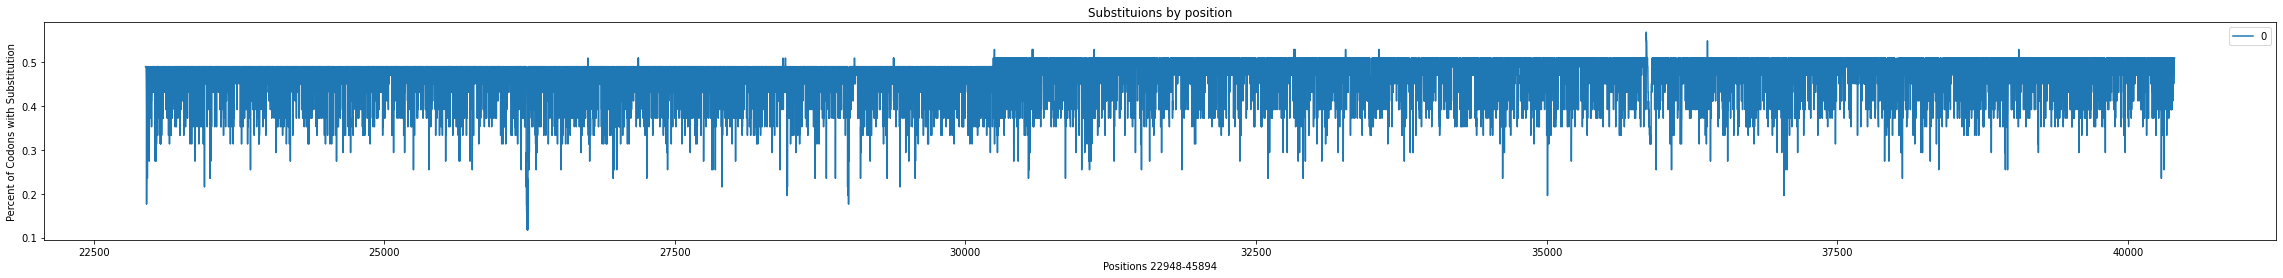

In [76]:
printPlot(startLocation = 0, endLocation = 22946, \
            figureSizeWidth = 40, figureSizeHeight = 4,\
            dataPoints = substitutionsLocalsCodons_MSA, \
            nucOrCodons = "Codons")
printPlot(startLocation = 22947, endLocation = (45893), \
            figureSizeWidth = 40, figureSizeHeight = 4,\
            dataPoints = substitutionsLocalsCodons_MSA, \
            nucOrCodons = "Codons")

print("")

printPlot(startLocation = 0, endLocation = 22946, \
            figureSizeWidth = 40, figureSizeHeight = 4,\
            dataPoints = substitutionsLocalsCodons_MSA_C, \
            nucOrCodons = "Codons")
printPlot(startLocation = 22947, endLocation = (45893), \
            figureSizeWidth = 40, figureSizeHeight = 4,\
            dataPoints = substitutionsLocalsCodons_MSA_C, \
            nucOrCodons = "Codons")

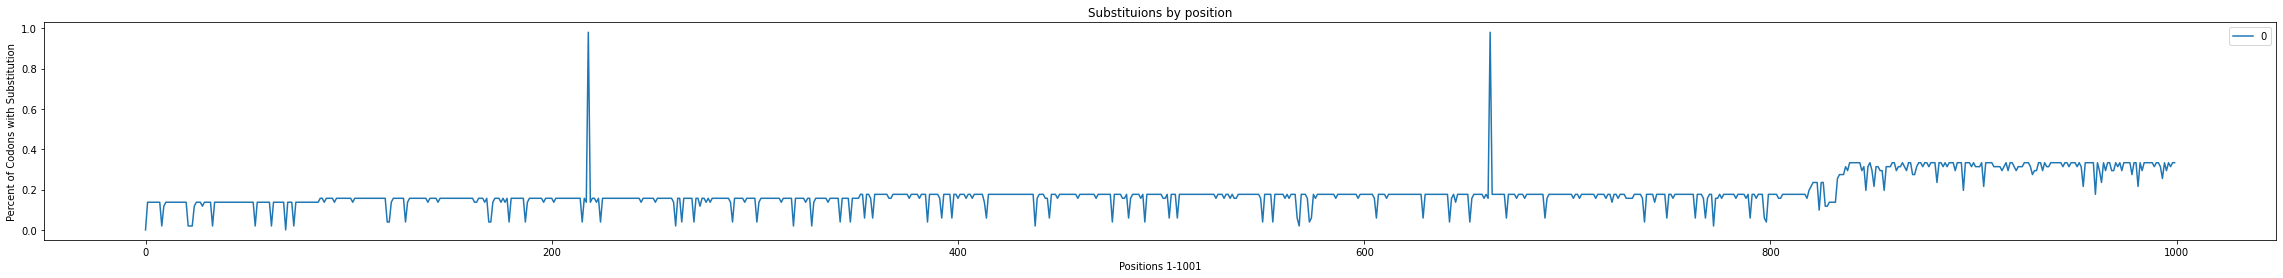

In [77]:
printPlot(startLocation = 0, endLocation = 1000, \
            figureSizeWidth = 40, figureSizeHeight = 4,\
            dataPoints = substitutionsLocalsCodons_MSA, \
            nucOrCodons = "Codons")

## Summary MSA

In [78]:
substitutionsLocations50MSA_US = []
substitutionsLocations50MSA_US = breakdownOfSubstitutions50MSA(\
                                      RefGenome = dataFrame50MPoc["ON563414"])
substitutionsLocations50MSA_US = [x / 51 for x in substitutionsLocations50MSA_US]
substitutionsLocals50MSA_US = pd.DataFrame(substitutionsLocations50MSA_US)

substitutionsLocations50MSA_US2 = []
substitutionsLocations50MSA_US2 = breakdownOfSubstitutions50MSA(\
                                      RefGenome = dataFrame50MPoc["ON676703"])
substitutionsLocations50MSA_US2 = [x / 51 for x in substitutionsLocations50MSA_US2]
substitutionsLocals50MSA_US2 = pd.DataFrame(substitutionsLocations50MSA_US2)

substitutionsLocations50MSA_USC = []
substitutionsLocations50MSA_USC = breakdownOfSubstitutions50MSA(\
                                      RefGenome = dataFrame50MPoc["consensus"])
substitutionsLocations50MSA_USC = [x / 51 for x in substitutionsLocations50MSA_USC]
substitutionsLocals50MSA_USC = pd.DataFrame(substitutionsLocations50MSA_USC)

In [79]:
def printBoxPlotNucleotidesMSA(startLocation = 0, endLocation = 200):
  NucleotideComparisons = {"Original Reference (NC_063383)": \
                        substitutionsLocations50MSA[startLocation:endLocation],\
                         "First US Genome (ON_563414)": \
                        substitutionsLocations50MSA_US[startLocation:endLocation],\
                         "First CA Genome (ON_676703)": \
                        substitutionsLocations50MSA_US2[startLocation:endLocation]}
  NucComparisons = pd.DataFrame.from_dict(NucleotideComparisons)
  NComparisonsBoxPlot = NucComparisons.boxplot(column=\
                                          ['Original Reference (NC_063383)',\
                                           'First US Genome (ON_563414)',\
                                           'First CA Genome (ON_676703)'],\
                                            rot = 25)
  # plt.ylabel() = 

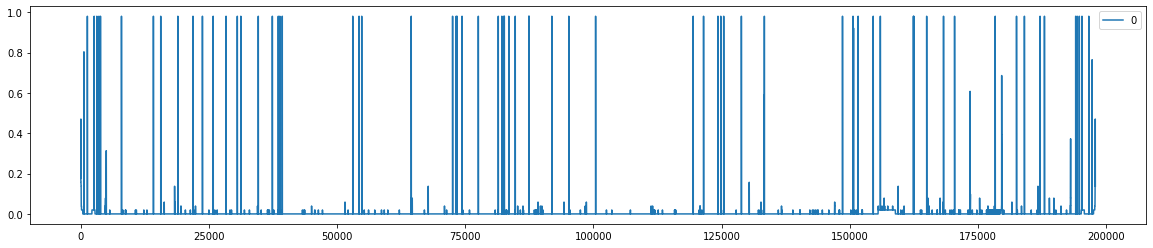

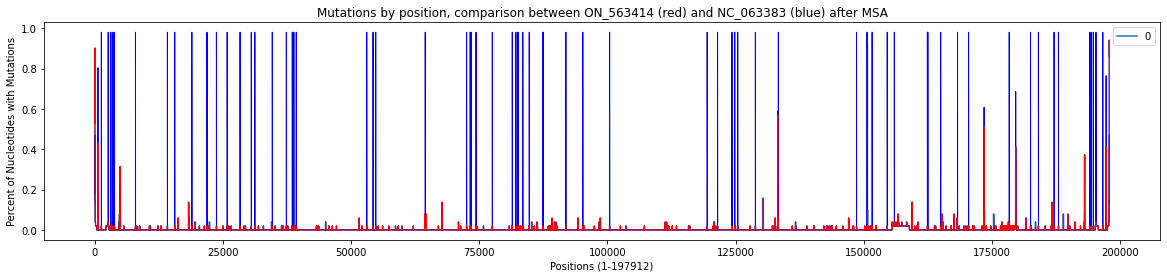

In [108]:
SubLocalPlot2 = substitutionsLocals50MSA[0:197911]\
                .plot(figsize=(20, 4))
SubLocalPlot3 = substitutionsLocals50MSA_US[0:197911]\
                .plot(figsize=(20, 4))
# xlabel = str
plt.plot(substitutionsLocals50MSA[0:197911], color = 'blue', \
         linewidth=1)
plt.plot(substitutionsLocals50MSA_US[0:197911], color = 'red', \
         linewidth=1)
plt.xlabel(f"Positions (1-197912)")
plt.ylabel(f"Percent of Nucleotides with Mutations")
plt.title("Mutations by position, comparison between ON_563414 (red) and NC_063383 (blue) after MSA")

# plt.plot(SubLocalPlot3)
plt.show()

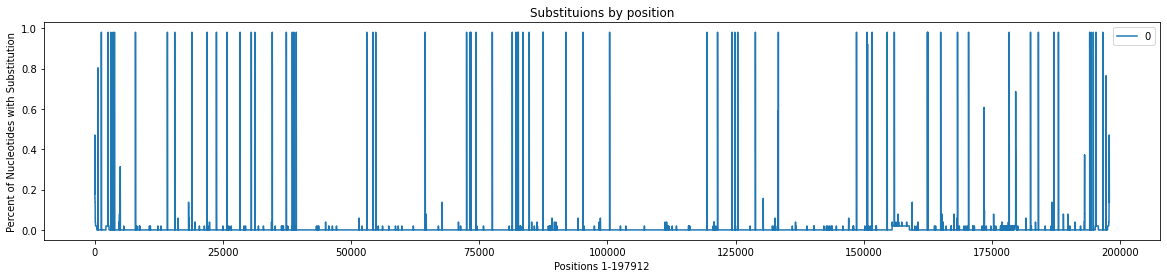

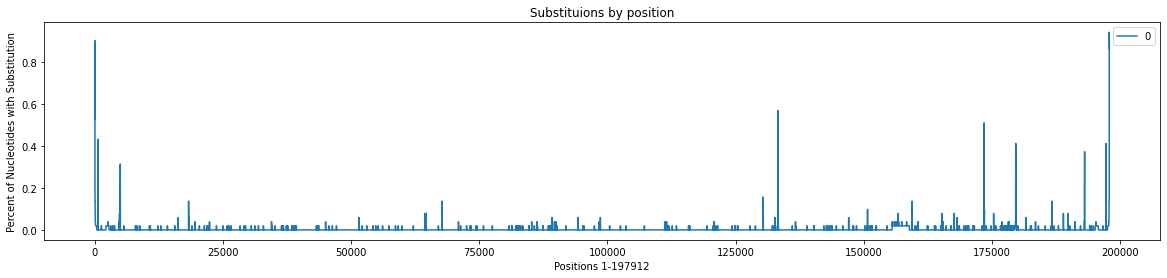

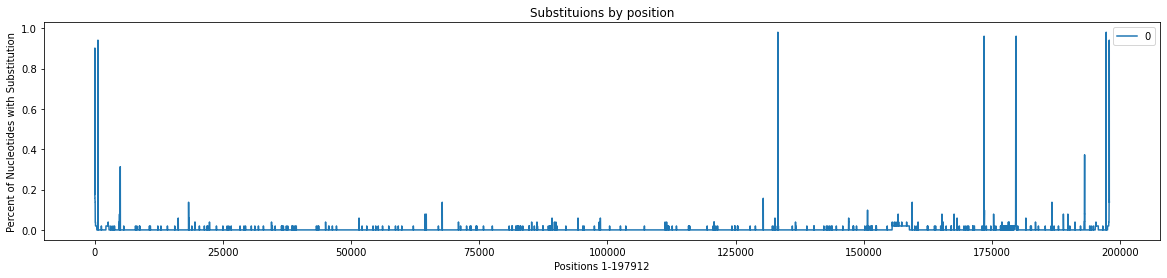

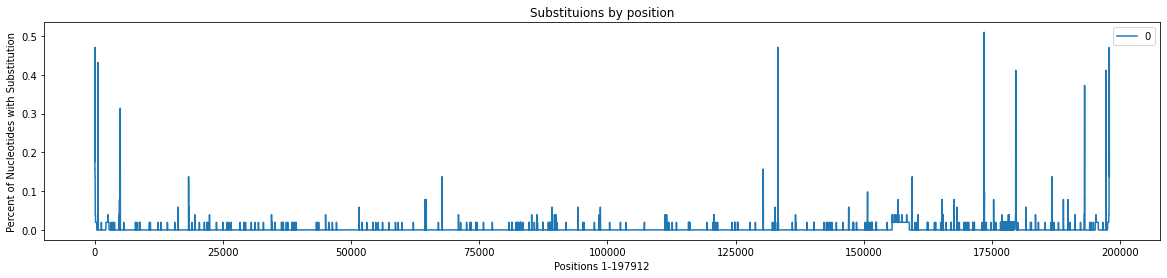

In [85]:
printPlot(startLocation = 0, endLocation = 197911, \
            figureSizeWidth = 20, figureSizeHeight = 4,\
            dataPoints = substitutionsLocals50MSA, \
            nucOrCodons = "Nucleotides")
printPlot(startLocation = 0, endLocation = 197911, \
            figureSizeWidth = 20, figureSizeHeight = 4,\
            dataPoints = substitutionsLocals50MSA_US, \
            nucOrCodons = "Nucleotides")
printPlot(startLocation = 0, endLocation = 197911, \
            figureSizeWidth = 20, figureSizeHeight = 4,\
            dataPoints = substitutionsLocals50MSA_US2, \
            nucOrCodons = "Nucleotides")
printPlot(startLocation = 0, endLocation = 197911, \
            figureSizeWidth = 20, figureSizeHeight = 4,\
            dataPoints = substitutionsLocals50MSA_USC, \
            nucOrCodons = "Nucleotides")

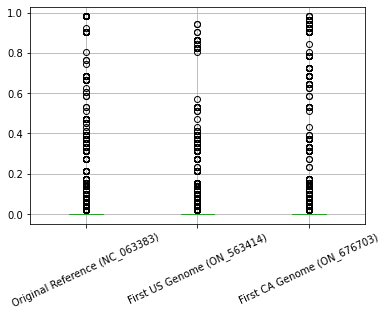

In [81]:
printBoxPlotNucleotidesMSA(0, 197911)

AttributeError: ignored

9564
[0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.37254901960784315, 0.37254901960784315, 0.37254901960784315, 0.37254901960784315, 0.37254901960784315, 0.45098039215686275, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.1568627450980392, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.1

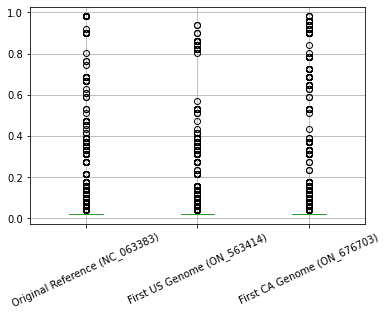

In [82]:
non_ZeroList_1 = []
non_ZeroList_2 = []
non_ZeroList_3 = []
for i in substitutionsLocations50MSA:
  if i != 0:
    non_ZeroList_1.append(i.copy())
print(len(non_ZeroList_1))
print(non_ZeroList_1)
print(sorted(non_ZeroList_1))
print(sum(non_ZeroList_1)/len(non_ZeroList_1))
for i in substitutionsLocations50MSA_US:
  if i != 0:
    non_ZeroList_2.append(i.copy())
print(len(non_ZeroList_2))
print(sorted(non_ZeroList_2))
print(sum(non_ZeroList_2)/len(non_ZeroList_2))
for i in substitutionsLocations50MSA_US2:
  if i != 0:
    non_ZeroList_3.append(i.copy())
print(len(non_ZeroList_3))
print(sorted(non_ZeroList_3))
print(sum(non_ZeroList_3)/len(non_ZeroList_3))


NucleotideComparisons_C = {"Original Reference (NC_063383)": \
                        non_ZeroList_1,\
                         "First US Genome (ON_563414)": \
                        non_ZeroList_2,\
                         "First CA Genome (ON_676703)": \
                        non_ZeroList_3}
NucComparisons_C = pd.DataFrame.from_dict(NucleotideComparisons_C)
NComparisonsBoxPlot_C = NucComparisons_C.boxplot(column=\
                                          ['Original Reference (NC_063383)',\
                                           'First US Genome (ON_563414)',\
                                           'First CA Genome (ON_676703)'],\
                                            rot = 25)


# Notes/Old Drafts

In [83]:
# file_fasta = "sequences.fasta"
# file_csv = "sequences.csv"
# infile = open("/content/drive/My Drive/QBIO_401_notes/sequences.fasta")
# import time
# start_time = time.time()
# genome = []
# dictionaryOfGenomes = {}
# counter = 0
# counter2 = 0
# for line in infile:
#         #in theory, this if statement is unneccesary, but serves as an error protection layer
#         if re.match(">", line):
#           linelistforkey = line.split(" ")
#           # key = linelistforkey[0]
#           linelistforkey2 = linelistforkey[0].split(">")[1]
#           linelistforkey3 = linelistforkey2.split(".")[0]
#           key = linelistforkey3
#           if (key in listOfAmericanSequences) == False:
#             counter = 1001
#           else:
#             counter2 += 1
#             print(key)
#             counter = 0
#           # if re.match(">OP156605.1", line):
#           # >OK573015.1 
#           #   counter = 250
#           continue
#         # seq = infile.readline() #read sequence
#         counter += 1
#         # print(len(line))
#         linelist = list(line)
#         # print(linelist[60])
#         # break
#         # print(linelist)
#         if counter == 1001:
#           dictionaryOfGenomes[key] = genome.copy()
#           # dataFrame1000MPoc = pd.DataFrame.from_dict(dictionaryOfGenomes)
#           # with pd.ExcelWriter('/content/drive/My Drive/QBIO_401_notes/Created_Excel.xlsx',mode='a', if_sheet_exists="replace") as writer:  
#             # dataFrame1000MPoc.to_excel(writer)
#           # dictionaryOfGenomes[key] = genome
#           genome.clear()
#           # if counter2 == 50:
#           #   break
#         elif counter > 1001:
#           continue
#         elif len(line) == 61:
#           for i in range(0,60,1):
#             genome.append(linelist[i])
#           # for i in range(0,len(seq),1): #for each score, transition to numeric score
#                   #
#                   #
#                   #
#                   #
#                   #
# infile.close()
# # print(len(dictionaryOfGenomes["OP820450"]))
# # print(len(dictionaryOfGenomes["OP820451"]))
# dataFrame1000MPoc = pd.DataFrame.from_dict(dictionaryOfGenomes)
# print("--- %s seconds ---" % (time.time() - start_time))

In [84]:
# listlistlist = []
# for i in codons:
#   for j in i:
#     listlistlist.append(j)
# print(listlistlist)
# print(len(listlistlist))
# withCodon = ((dataFrame1000MPocCodons == listlistlist[0]) |\
#             (dataFrame1000MPocCodons == listlistlist[1]) |\
#             (dataFrame1000MPocCodons == listlistlist[2]) |\
#             (dataFrame1000MPocCodons == listlistlist[3]) |\
#             (dataFrame1000MPocCodons == listlistlist[4]) |\
#             (dataFrame1000MPocCodons == listlistlist[5]) |\
#             (dataFrame1000MPocCodons == listlistlist[6]) |\
#             (dataFrame1000MPocCodons == listlistlist[7]) |\
#             (dataFrame1000MPocCodons == listlistlist[8]) |\
#             (dataFrame1000MPocCodons == listlistlist[9]) |\
#             (dataFrame1000MPocCodons == listlistlist[10]) |\
#             (dataFrame1000MPocCodons == listlistlist[11]) |\
#             (dataFrame1000MPocCodons == listlistlist[12]) |\
#             (dataFrame1000MPocCodons == listlistlist[13]) |\
#             (dataFrame1000MPocCodons == listlistlist[14]) |\
#             (dataFrame1000MPocCodons == listlistlist[15]) |\
#             (dataFrame1000MPocCodons == listlistlist[16]) |\
#             (dataFrame1000MPocCodons == listlistlist[17]) |\
#             (dataFrame1000MPocCodons == listlistlist[18]) |\
#             (dataFrame1000MPocCodons == listlistlist[19]) |\
#             (dataFrame1000MPocCodons == listlistlist[20]) |\
#             (dataFrame1000MPocCodons == listlistlist[21]) |\
#             (dataFrame1000MPocCodons == listlistlist[22]) |\
#             (dataFrame1000MPocCodons == listlistlist[23]) |\
#             (dataFrame1000MPocCodons == listlistlist[24]) |\
#             (dataFrame1000MPocCodons == listlistlist[25]) |\
#             (dataFrame1000MPocCodons == listlistlist[26]) |\
#             (dataFrame1000MPocCodons == listlistlist[27]) |\
#             (dataFrame1000MPocCodons == listlistlist[28]) |\
#             (dataFrame1000MPocCodons == listlistlist[29]) |\
#             (dataFrame1000MPocCodons == listlistlist[30]) |\
#             (dataFrame1000MPocCodons == listlistlist[31]) |\
#             (dataFrame1000MPocCodons == listlistlist[32]) |\
#             (dataFrame1000MPocCodons == listlistlist[33]) |\
#             (dataFrame1000MPocCodons == listlistlist[34]) |\
#             (dataFrame1000MPocCodons == listlistlist[35]) |\
#             (dataFrame1000MPocCodons == listlistlist[36]) |\
#             (dataFrame1000MPocCodons == listlistlist[37]) |\
#             (dataFrame1000MPocCodons == listlistlist[38]) |\
#             (dataFrame1000MPocCodons == listlistlist[39]) |\
#             (dataFrame1000MPocCodons == listlistlist[40]) |\
#             (dataFrame1000MPocCodons == listlistlist[41]) |\
#             (dataFrame1000MPocCodons == listlistlist[42]) |\
#             (dataFrame1000MPocCodons == listlistlist[43]) |\
#             (dataFrame1000MPocCodons == listlistlist[44]) |\
#             (dataFrame1000MPocCodons == listlistlist[45]) |\
#             (dataFrame1000MPocCodons == listlistlist[46]) |\
#             (dataFrame1000MPocCodons == listlistlist[47]) |\
#             (dataFrame1000MPocCodons == listlistlist[48]) |\
#             (dataFrame1000MPocCodons == listlistlist[49]) |\
#             (dataFrame1000MPocCodons == listlistlist[50]) |\
#             (dataFrame1000MPocCodons == listlistlist[51]) |\
#             (dataFrame1000MPocCodons == listlistlist[52]) |\
#             (dataFrame1000MPocCodons == listlistlist[53]) |\
#             (dataFrame1000MPocCodons == listlistlist[54]) |\
#             (dataFrame1000MPocCodons == listlistlist[55]) |\
#             (dataFrame1000MPocCodons == listlistlist[56]) |\
#             (dataFrame1000MPocCodons == listlistlist[57]) |\
#             (dataFrame1000MPocCodons == listlistlist[58]) |\
#             (dataFrame1000MPocCodons == listlistlist[59]) |\
#             (dataFrame1000MPocCodons == listlistlist[60]) |\
#             (dataFrame1000MPocCodons == listlistlist[61]) |\
#             (dataFrame1000MPocCodons == listlistlist[62]) |\
#             (dataFrame1000MPocCodons == listlistlist[63])).astype(int).sum(axis=1)    